<a href="https://colab.research.google.com/github/EderCruz/Alura-ImersaoDados/blob/main/Eder_Barbosa_Projeto_Final_Bootcamp_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Aluno:** Eder Cruz Barbosa
https://www.linkedin.com/in/eder-barbosa-92908411a/

https://github.com/EderCruz

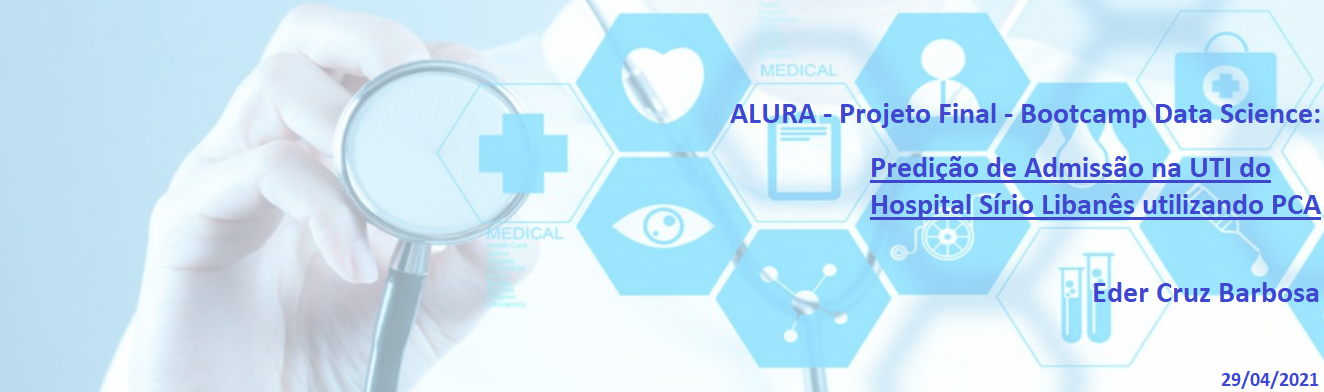

###**PROJETO Final - Bootcamp Ciência de Dados:** 
###**Predição de Admissão na UTI do Hospital Sírio Libanês utilizando PCA**

#**RESUMO**
Este trabalho, **PROJETO Final - Bootcamp Ciência de Dados:
Predição de Admissão na UTI do Hospital Sírio Libanês utilizando PCA**, se propõe a análisar os dados de pacientes do Hospital Sírio Libanês, disponível na plataforma Kaggle **[6]**, que possuam predisposição a serem admitidos nas Unidades de Terapia Intensiva (UTI) ou não. 

O objetivo é aplicar modelos de *Machine Learning* para predizer quando um paciente deve ser admitido na UTI ou não, baseado nas suas informações prévias.

Também são aplicados técnicas de redução de dimensionalidade das variáveis da base de dados, considerando o coeficiente de correlação, e aplicando o *Principal Component Analysis*, após, executa-se os modelos de *Machine Learning* nesses cenários e compara-se seus resultados.

Dados Análisados:
 - Kaggle_Sirio_Libanes_ICU_Prediction.xlsx **[6]**

Técnica de redução de dimensionalidade:
 - Redução pelo Coeficiente de Correlação
 - *Principal Component Analysis (PCA)*

Modelos de Machine Learning utilizados:
- *Logistic Regression*
- *Random Forest*
- *Extra Tree Classifier*
- *Gradient Boosting Classifier*
 

#1. Introdução
A pandemia de COVID-19 (*Coronavirus Disease 2019*) é caracterizada pela proliferação de uma doença respiratória causada pelo vetor coronavírus da síndrome respiratória aguda grave 2 (*SARS-CoV-2*) **[1][2]**. O primeiro registro desta doença é de dezembro de 2019 em Wuhan, na China **[3]**, em  janeiro de 2020, a Organização Mundial da Saúde (OMS) classificou como Emergência de Saúde Pública de Âmbito Internacional e, em 11 de março de 2020, como pandemia **[2]**. 

Desde do inicio a pandemia a COVID-19 tem causado colapso no sistemas de sáude ao redor do mundo e sobrecarregado Unidades de Terapia Intensiva (UTI), necessitando da reelaboração os críterios de admissão nesses locais de tratamento. Médicos intensivistas, por fim, são incubidos da difícil responsabilidade de decidir quais pacientes devem ou naõ serem encaminhados para a UTI **[4]** .

>*Entendemos que os médicos não devem arcar sozinhos com o peso de decisões emocionalmente tão difíceis e que a população deva ter que arcar com o trauma de testemunhar mortes que poderiam ser evitadas com a ampliação de serviços* **[4]**

Até a data presente deste trabalho (29/04/2021), o Brasil acumulou 14.521.289 casos, 398.185 óbitos acumulados, e o recorde de 4.249 morte em 24 horas no dia 08/04/2021 **[5]**.

Neste contexto, surge a necessidade de obter um modelo de predição que possa amenizar o colapso do sistema de saúde e que considere os elementos de admissão em UTI (quantidade de camas, recursos humanos, doenças preexistentes, características dos pacientes, profissionais capacitados etc).

Utilizando os dados disponibilizados pelo Hospital Sírio libanês - São Paulo e Brasília, sobre admissão em UTI, disponiveis no plataforma kaggle [6], este trabalho se propõe a analisar estes dados e utilizar um algoritmo de predição que possa auxiliar na tomada de decisão na admissão de paciente em UTI.

Nesta base de dados encontramos quatro grupos de informações:

- Informação demográfica - 3 variáveis
- Doenças preexistentes - 9 variáveis
- Resultados do exame de sangue - 36 variáveis
- Sinais vitais - 6 variáveis

O objetivo, portanto, é prever quais pacientes precisarão ser admitidos na UTI a partir dos dados clínicos individuais disponíveis.



#**2. Método**
- Análisar os dados de pacientes do Hospital Sírio Libanês que são admitidos ou não em Unidades de Terapia Intensiva.
- Aplicar os modelos de Machine Learning.
- Diminuir a dimensionalidade das *features* baseado na sua correlção da base de dados.
- Aplicar os modelos de Machine Learning na redução da dimensionalidade dos dados.
- Aplicar a técnica de *Principal Component Analysis (PCA)*.
- Aplicar os modelos de Machine Learning após a aplicação do *PCA*.
- Definir métricas de avalição dos modelos de *Machine Learning*.
- Avaliar e analisar os modelos de *Machine Learning* nos respectivos e cenários de dimensionalidades da base de dados.

#**3. Características da base de dados**.
A base de dados do Hospital Sírio-Libanês contêm informações anonimizadas dos pacientes, provenientes de São Paulo e Brasil.

A base apresente quatro grupos de informações:

- Informação demográfica - 3 variáveis
- Doenças preexistentes - 9 variáveis
- Resultados do exame de sangue - 36 variáveis
- Sinais vitais - 6 variáveis

E o conceito de **Janela**, uma campo que apresenta um valor entre 0 e 12, que indica em qual hora aquele paciente foi admitido na UTI:

<table>
<tr>
    <th>Janela</th>
    <th>Hora de Admissão na UTI</th>
  </tr>
    <tr>
    <td>0-2</td>
    <td>0 a 2 horas para admissão</td>
  </tr>
  <tr>
    <td>0-2</td>
    <td>0 a 2 horas para admissão</td>
    <tr>
    <td>2-4</td>
    <td>2 a 4 horas para admissão</td>
    <tr>
    <td>4-6</td>
    <td>4 a 6 horas para admissão</td>
    <tr>
    <td>6-12</td>
    <td>6 a 12 horas para admissão</td>
    <tr>
    <td>Acima de 12</td>
    <td>Acima a 12 horas para admissão</td>

Isto significa que os dados do paciente só podem ser utilizados antes do tempo de admissão na UTI.

#**4. Carregamentos dos dados**

Importação de Bibliotecas

In [148]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [149]:
#! pip install pycaret

#from pycaret.utils import enable_colab 
#enable_colab()

#from pycaret.classification import setup
#from pycaret.classification import compare_models

#Para utilizar essa linhas de comando é só retirar os comentários '#'

##**4.1. Carregamento das bases de dados e tratamento das tabelas**

In [150]:
caminho_dados_uti_sirio_libanes = '/content/drive/MyDrive/Arquivos_Data_Science_Carregar_Colab/projeto_final_pred_UCI/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx'

dados_uti_sirio_libanes = pd.read_excel(caminho_dados_uti_sirio_libanes)

## **4.2 Funções**

Função que utiliza uma estratégia de preenchimento de dados contínuos faltantes na base de dados do Sírio Libanês

In [151]:
def preenche_base_dados_faltantes(dados):
    features_continuas_colunas = dados.iloc[:, 13:-2].columns
    features_continuas = dados.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False)[features_continuas_colunas].fillna(method='bfill').fillna(method='ffill')
    features_categoricas = dados.iloc[:, :13]
    saida = dados.iloc[:, -2:]
    dados_finais = pd.concat([features_categoricas, features_continuas, saida], ignore_index=True,axis=1)
    dados_finais.columns = dados.columns
    return dados_finais

Função para gerar matriz de confusão retirado de https://github.com/DTrimarchi10/confusion_matrix **[7]**

In [152]:
def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True,
                          xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Blues',
                          title=None):
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Valor Real', fontsize=14)
        plt.xlabel('Predição' + stats_text,fontsize=14)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title, fontsize=14, fontweight='bold')

    plt.show()

Função que exibe a matriz de dados faltantes

In [153]:
def exibe_matriz_faltantes(dados):
  ax = msno.matrix(dados, figsize=(30, 15), fontsize=7, labels=True)
  ax.set_title('Matriz de Dados Faltantes', fontsize=30)

In [154]:
def plot_countplot_horizontal(dados, coluna_alvo, titulo, label_x, label_y):
  plt.figure(figsize=(10,6))
  sns.set_theme(style="darkgrid")
  ax = sns.countplot(y=coluna_alvo, data=dados)
  ax.set_title(titulo, {'size':16})
  ax.set_ylabel(label_y, {'size':16})
  ax.set_xlabel(label_x, {'size':16})
  for p in ax.patches:
        value = format(p.get_width())
        x = p.get_x() + p.get_width() + 2
        y = p.get_y() + p.get_height()/2
        ax.annotate(value, (x, y))

In [155]:
def constroi_df_categorico(dados):
  num_rows = dados.shape[0]
  dados_f = dados.T
  dados_f['Apresenta'] = dados_f.sum(axis=1)
  dados_f['Nao_apresenta'] = num_rows - dados_f['Apresenta'] 
  dados_f = dados_f[['Apresenta','Nao_apresenta']]
  return dados_f

In [156]:
def plot_dados_categorigos(dados, titulo, label_y):
  ax = dados.plot(kind='bar', figsize=(18,8))
  plt.title(titulo)
  plt.xticks(rotation=45)
  plt.grid(True, linestyle='--')
  plt.ylabel('label_y')

In [157]:
def prepare_window(rows):
  if(np.any(rows['ICU'])):
    rows.loc[rows["WINDOW"] == '0-2', 'ICU'] = 1
  return  rows.loc[rows["WINDOW"] == '0-2']

In [158]:
def prepara_continuos(dados):
  dados_result = dados.copy()
  dados_result = dados_result.drop(['PATIENT_VISIT_IDENTIFIER'], axis=1)
  dados_result = dados_result.reset_index()
  dados_result = dados_result.drop(['PATIENT_VISIT_IDENTIFIER','level_1'], axis=1)
  return dados_result

In [159]:
def melt_continuos(df_alvo_melt):
  tab_melt = df_alvo_melt.T.reset_index().melt(id_vars = ['index'], value_vars=df_alvo_melt.T.columns )
  tab_melt.columns = ["tipo_categoria","id","valor"]
  return tab_melt

In [160]:
def barplot_continuos(dados, titulo, labelx, labely):
  plt.figure(figsize=(15,22))
  ax = sns.boxplot( y='tipo_categoria', x='valor', data = dados );
  sns.set_theme(style="whitegrid")
  ax.set_title(titulo, {'size':16})
  ax.set_ylabel(labely, {'size':16})
  ax.set_xlabel(labelx, {'size':16})
  plt.show()

In [161]:
def exec_modelo_cross_validation(modelo, dados, n_splits, n_repeats):

    np.random.seed(1231234) 
    dados = dados.sample(frac=1).reset_index(drop=True) 
    x_columns = dados.columns
    y = dados["ICU"]
    x = dados[x_columns].drop(["ICU"], axis=1)

    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

    cross_validation = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats=n_repeats)

    resultados_cross_validate = cross_validate(modelo, 
                                               x_train, y_train, 
                                               cv=cross_validation, scoring='roc_auc', 
                                               return_train_score=True, return_estimator=True)
    
    return resultados_cross_validate, x_test, y_test

In [162]:
def exibe_matriz_confusao(result_cv, x_test, y_test, title_model):
  modelos_matriz_confusao = []
  for cross_validate_modelo in result_cv['estimator']:
    y_pred = cross_validate_modelo.predict(x_test)
    modelos_matriz_confusao.append(confusion_matrix(y_test, y_pred))

  media_matriz_confusao = np.mean(modelos_matriz_confusao, axis=0)

  cf_matrix = np.around(media_matriz_confusao)

  group_names = ["Verdade Neg","Falso Pos","Falso Neg","Verdade Pos"]
   
  make_confusion_matrix(cf_matrix, group_names=group_names, categories='auto', count=True, percent=True,
                          cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None,
                          cmap='Oranges_r', title='Matriz de Confusão - '+ title_model)

In [163]:
def exibe_auc(result_cv):
  auc_medio = np.mean(result_cv['test_score'])
  auc_std = np.std(result_cv['test_score'])
  
  print(f' AUC Médio: {auc_medio:.4f}'
        f'\n Intervalo de confiança: {auc_medio-(2*auc_std):.4f} - {auc_medio+(2*auc_std):.4f}')

In [164]:
def exibe_classification_report_accur_score(modelo,dados):
  np.random.seed(1231234) 
  dados = dados.sample(frac=1).reset_index(drop=True) 
  x_columns = dados.columns
  y = dados["ICU"]
  x = dados[x_columns].drop(["ICU"], axis=1)

  x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
  
  modelo.fit(x_train, y_train)
  y_pred = modelo.predict(x_test)
  print('Accuracy Score: ' ,accuracy_score(y_test, y_pred))
  print('\n')
  print('Classification Report: ')
  print(classification_report(y_test, y_pred))

  

In [165]:
def exibe_result_modelo_machine_learning(modelo, dados,n_splits, n_repeats, titulo_modelo):
  result, x_test, y_test = exec_modelo_cross_validation(modelo, dados, n_splits, n_repeats)
  exibe_auc(result)
  exibe_matriz_confusao(result, x_test, y_test, titulo_modelo)
  

In [166]:
def exec_modelo_cross_validation_grid_search(modelo, dados, num_splits, num_repeats, param_grid_RF):

    np.random.seed(1231234)
    dados = dados.sample(frac=1).reset_index(drop=True)

    x_columns = dados.columns
    y = dados["ICU"]
    x = dados[x_columns].drop(["ICU"], axis=1)

    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

    cross_val_repeatdeStratifkFold = RepeatedStratifiedKFold(n_splits=num_splits, n_repeats = num_repeats)
    

    busca_grid = GridSearchCV(modelo,cv = cross_val_repeatdeStratifkFold, scoring='roc_auc', 
                         param_grid=param_grid_RF,
                         return_train_score=True)
    busca_grid.fit(x_train, y_train)
   
    cv_modelo = busca_grid.best_estimator_
    y_pred = cv_modelo.predict(x_test)

    return cv_modelo, busca_grid, y_test, y_pred, x_test

In [167]:
def exibe_matriz_confusao_grid_search(y_test, y_pred, title_modelo):
  search_confusion_matrix = confusion_matrix(y_test, y_pred)
  
  group_names = ["Verdade Neg","Falso Pos","Falso Neg","Verdade Pos"]
   
  make_confusion_matrix(search_confusion_matrix, group_names=group_names, categories='auto', count=True, percent=True,
                          cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None,
                          cmap='Oranges_r', title='Matriz de Confusão - '+ title_modelo)

In [168]:
def exibe_auc_search_grid(clf_grid):
  resultados = pd.DataFrame(clf_grid.cv_results_)
  
  auc_medio = resultados.iloc[clf_grid.best_index_]['mean_test_score']
  auc_std = resultados.iloc[clf_grid.best_index_]['std_test_score']
  
  print(f' AUC Médio: {auc_medio:.4f}')
  print(f'Intervalo de confiança = {auc_medio-(2*auc_std):.4f} - {auc_medio+(2*auc_std):.4f}')

In [169]:
def exibe_classification_report_grid_search(clf_grid, x_test, y_test):
  print('\n')
  print('Classification Report: ')
  print(classification_report(y_test,clf_grid.best_estimator_.predict(x_test)))

In [170]:
def plot_roc_auc(clf_grid, x_test, y_test, title_modelo):
  y_pred_proba = clf_grid.predict_proba(x_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  plt.plot(fpr,tpr,label="auc="+str(auc),color='red')
  plt.plot([0,1], [0,1], color='blue')
  
  plt.xticks(np.arange(0.0, 1.1, step=0.1))
  plt.xlabel("Taxa de Falso Positivo", fontsize=14)

  plt.yticks(np.arange(0.0, 1.1, step=0.1))
  plt.ylabel("Taxa de Verdadeiro Positivo", fontsize=14)
  title_auc = "\n AUC={:0.8f}".format(auc)

  plt.title('ROC CURVE - '+title_modelo +title_auc, fontweight='bold', fontsize=14)
  plt.legend(prop={'size':13}, loc='lower right')

  plt.show()    

In [171]:
def exibe_result_modelo_machine_learning_grid_search(modelo, dados,n_splits, n_repeats, param, titulo_modelo):
  cv_modelo, classf_grid, y_test, y_pred, x_test = exec_modelo_cross_validation_grid_search(modelo, dados, n_splits, n_repeats, param)
  exibe_auc_search_grid(classf_grid)
  exibe_classification_report_grid_search(classf_grid, x_test, y_test)
  exibe_matriz_confusao_grid_search(y_test, y_pred, titulo_modelo)
  plot_roc_auc(classf_grid, x_test, y_test,titulo_modelo)

In [172]:
def remove_correlacao (dados, valor_corte):
  matriz_corr = dados.iloc[:,4:-2].corr().abs()
  matriz__triang_superior = matriz_corr.where(np.triu(np.ones(matriz_corr.shape), k=1).astype(np.bool))
  excluir = [coluna for coluna in matriz__triang_superior.columns if any(matriz__triang_superior[coluna] > valor_corte)]

  return dados.drop(excluir, axis=1)

In [173]:
def plot_bar_result(dados, title_plot_bar):
  ax =dados[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Médio']].plot(kind='barh', figsize=(10,5), width=0.65)
  plt.title(title_plot_bar, fontsize=14, fontweight='bold')
  plt.grid(True, linestyle='--')
  plt.ylabel('Modelos de Classificação', fontsize=14,fontweight='bold')
  plt.legend(loc = 'upper right', bbox_to_anchor=(0.8, 0.9, 0.45, 0.1))
  ax.invert_yaxis() 

#**5. Análise da Bases de Dados do Sírio Libanês ICU**

In [174]:
dados_uti_sirio_libanes.head(7)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.33913,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,

In [175]:
dados_uti_sirio_libanes.tail(7)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
1918,383,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.160494,-0.538462,-0.188679,-0.525424,-0.107143,0.684211,-0.160494,-0.538462,-0.188679,-0.517241,-0.107143,0.684211,0.030928,-0.250,-0.076923,-0.428571,0.318681,0.878788,-0.418803,-0.675676,-0.358209,-0.575758,-0.275362,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0
1919,383,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.210526,0.210526,0.210526,0.210526,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.975929,-0.975929,...,-0.978029,-1.0,-0.083298,-0.478691,-0.190414,-0.541009,0.036125,0.705989,-0.160494,-0.538462,-0.188679,-0.517241,0.000000,0.736842,-0.175258,-0.375,-0.418803,-0.714286,0.164835,0.797980,-0.076923,-0.470270,-0.029851,-0.393939,0.043478,0.894737,-0.478261,-0.644172,-0.358779,-0.588235,-0.571429,-0.838384,-0.552795,-0.585967,-0.557252,-0.573477,-0.572609,-0.838524,ABOVE_12,0
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.012346,-0.292308,0.056604,-0.525424,0.535714,0.789474,0.012346,-0.292308,0.056604,-0.517241,0.535714,0.789474,0.175258,-0.050,0.145299,-0.428571,0.714286,0.919192,-0.299145,-0.502703,-0.164179,-0.575758,0.246377,0.789474,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.717277,-0.717277,-0.717277,-0.717277,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.170732,-0.170732,-0.170732,-0.170732,-1.0,-0.982208,-0.982208,...,-0.979571,-1.0,0.086420,-0.384615,-0.113208,-0.593220,0.142857,0.578947,0.086420,-0.384615,-0.113208,-0.586207,0.142857,0.578947,0.237113,-0.125,-0.008547,-0.500000,0.472527,0.838384,-0.247863,-0.567568,-0.298507,-0.636364,-0.072464,0.578947,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [176]:
dados_uti_sirio_libanes.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,...,821.000000,821.000000,821.0,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,0.158333,0.809896,0.528527,0.528527,0.528527,0.528527,-1.0,-0.963433,-0.963433,-0.963433,-0.963433,-1.0,-0.931121,-0.931121,-0.931121,-0.931121,-1.0,-0.310924,-0.310924,-0.310924,-0.310924,-1.0,-0.311845,-0.311845,-0.311845,-0.311845,-1.0,-0.945928,-0.945928,-0.945928,...,-0.954177,-0.954177,-1.0,-0.093631,-0.332600,-0.264701,-0.438754,0.066893,0.743077,-0.097790,-0.338468,-0.268632,-0.435121,0.063798,0.748588,-0.040855,-0.207812,-0.264999,-0.483129,0.326823,0.817565,-0.235001,-0.399582,-0.282029,-0.316753,0.014964,0.818593,-0.752454,-0.728053,-0.754100,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,0.365148,0.392485,0.224100,0.224100,0.224100,0.224100,0.0,0.160870,0.160870,0.160870,0.160870,0.0,0.169509,0.169509,0.169509,0.169509,0.0,0.100256,0.100256,0.100256,0.100256,0.0,0.118812,0.118812,0.118812,0.118812,0.0,0.076610,0.076610,0.076610,...,0.123582,0.123582,0.0,0.252064,0.274102,0.246760,0.217113,0.242858,0.132635,0.257733,0.277952,0.252709,0.225554,0.249208,0.125994,0.281304,0.277802,0.272725,0.278239,0.216198,0.283453,0.271123,0.287580,0.296247,0.402675,0.276163,0.141316,0.364001,0.408677,0.366349,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000

A tabela apresenta 1925 linhas, porém o campo **PATIENT_VISIT_IDENTIFIER** informa o identificador do paciente, sendo que cada linha representa uma estado de monitoria do paciente naquela **window** (janela) de tempo. Portanto, temos 385 pacientes ( valor max do campo **PATIENT_VISIT_IDENTIFIER** mais o paciente 0 ) , e 1925 registros dos mesmo.


Existem três colunalas referentes a informações demográficas dos pacientes: **[4]**
- **AGE_ABOVE65**: Paciente maior de 65 anos valor 1, menos valor 0
- **AGE_PERCENTIL**: Categoriza a idade do paciente em faixa etária de décadas
- **GENDER**: Indica gênero, 0 ou 1	

Nove colunas referentes a doenças de conhecimento prévio
- De **DISEASE GROUPING 1** a **DISEASE GROUPING 6**
- **HTN**
- **IMMUNOCOMPROMISED** - Se o paciente é imunocompromedido.
- **OTHER**

36 colunas referentes a exames de sangue
- Apresentam média (*mean*), mediana(*median*), máximo (*max*), mínimo (*min*), diferença entre máximo e mínimo (*diff = max - min*), e diferença relativa (*diff/median*)

Seis colunas referentes a sinais vitais
- Também apresentam média (*mean*), mediana(*median*), máximo (*max*), mínimo (*min*), diferença entre máximo e mínimo (*diff = max - min*), e diferença relativa (*diff/median*)



In [177]:
dados_uti_sirio_libanes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


In [178]:
dados_uti_sirio_libanes.select_dtypes(include='object')


,AGE_PERCENTIL,WINDOW
0,60th,0-2
1,60th,2-4
2,60th,4-6
3,60th,6-12
4,60th,ABOVE_12
...,...,...
1920,50th,0-2
1921,50th,2-4
1922,50th,4-6
1923,50th,6-12


Apenas as colunas **AGE_PERCENTIL**	e **WINDOW** representam valores não númericos.

## **5.1 Análise dos dados faltantes**

In [179]:
dados_uti_sirio_libanes.isna().sum()  

PATIENT_VISIT_IDENTIFIER        0
AGE_ABOVE65                     0
AGE_PERCENTIL                   0
GENDER                          0
DISEASE GROUPING 1              5
                             ... 
RESPIRATORY_RATE_DIFF_REL     748
TEMPERATURE_DIFF_REL          694
OXYGEN_SATURATION_DIFF_REL    686
WINDOW                          0
ICU                             0
Length: 231, dtype: int64

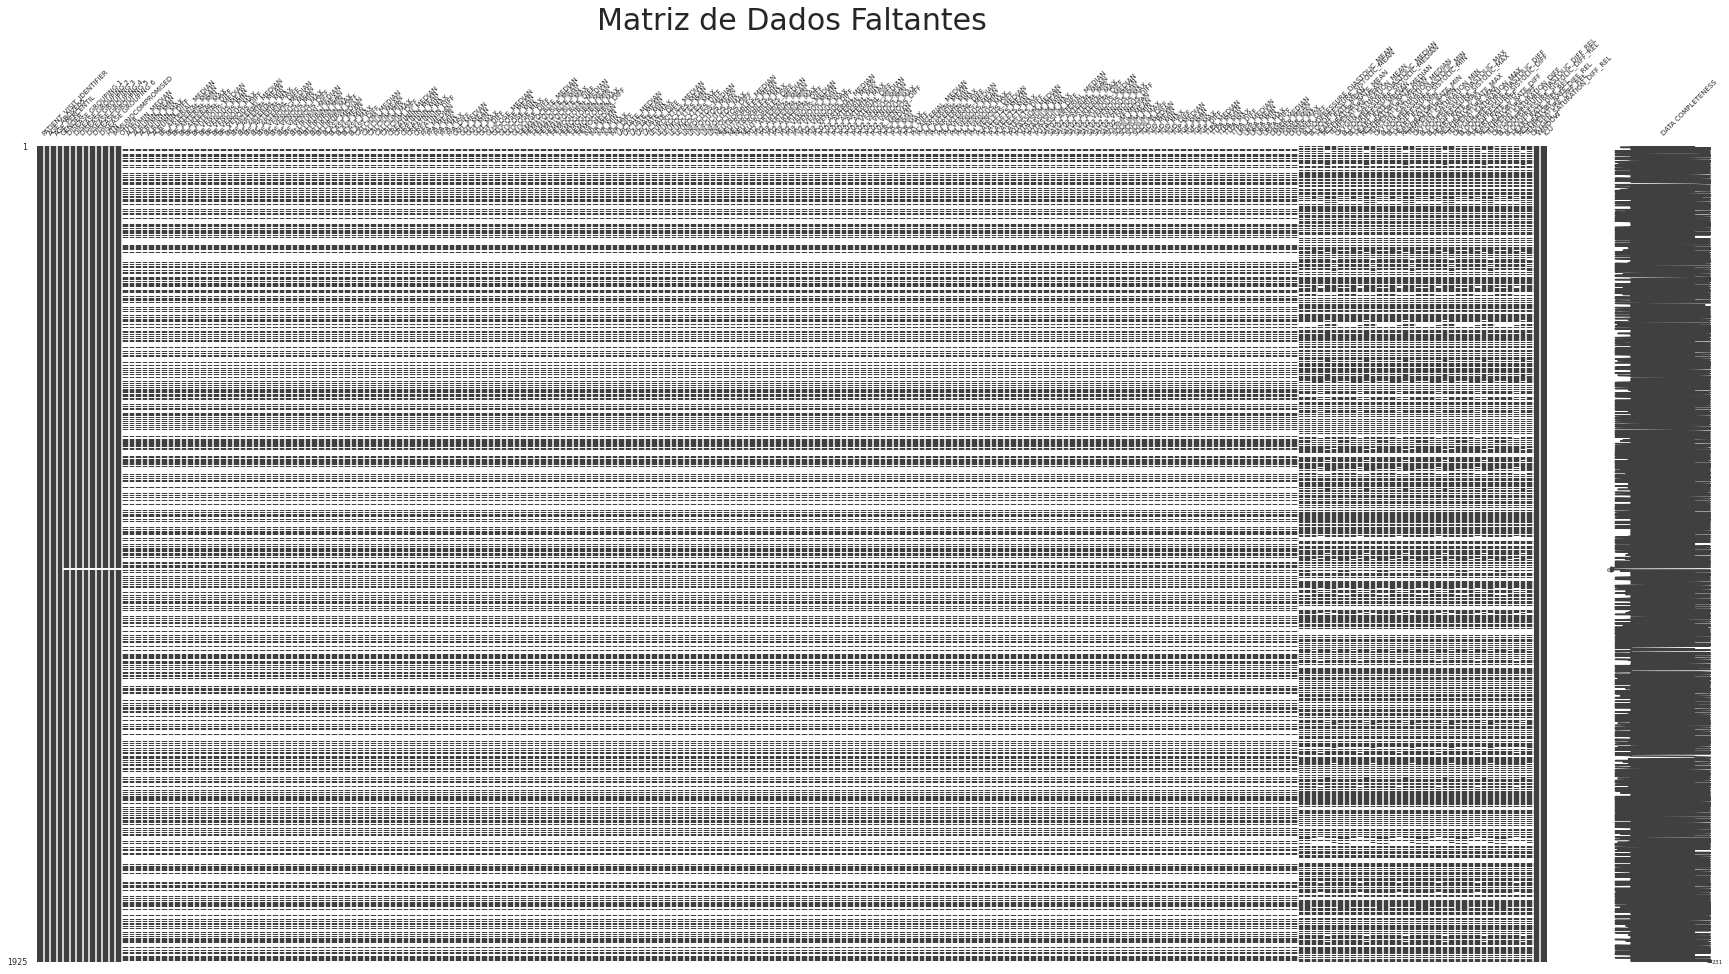

In [180]:
exibe_matriz_faltantes(dados_uti_sirio_libanes)

Como demonstrado, existem muitos dados fantantes na base de dados. 
Vamos abordar uma estrátegia para preencher os valores contínuos, com o mesmo valor anterior ao dado faltante, ou no caso da falta deste, com o valor a posteriror. 
Vamos utilizar a função da seção 4.2 Funções **preenche_base_dados_faltantes**, segue: 

In [181]:
dados_preenchido_sirios_libanes =preenche_base_dados_faltantes(dados_uti_sirio_libanes)

In [182]:
dados_preenchido_sirios_libanes.isna().sum()  

PATIENT_VISIT_IDENTIFIER      0
AGE_ABOVE65                   0
AGE_PERCENTIL                 0
GENDER                        0
DISEASE GROUPING 1            5
                             ..
RESPIRATORY_RATE_DIFF_REL     0
TEMPERATURE_DIFF_REL          0
OXYGEN_SATURATION_DIFF_REL    0
WINDOW                        0
ICU                           0
Length: 231, dtype: int64

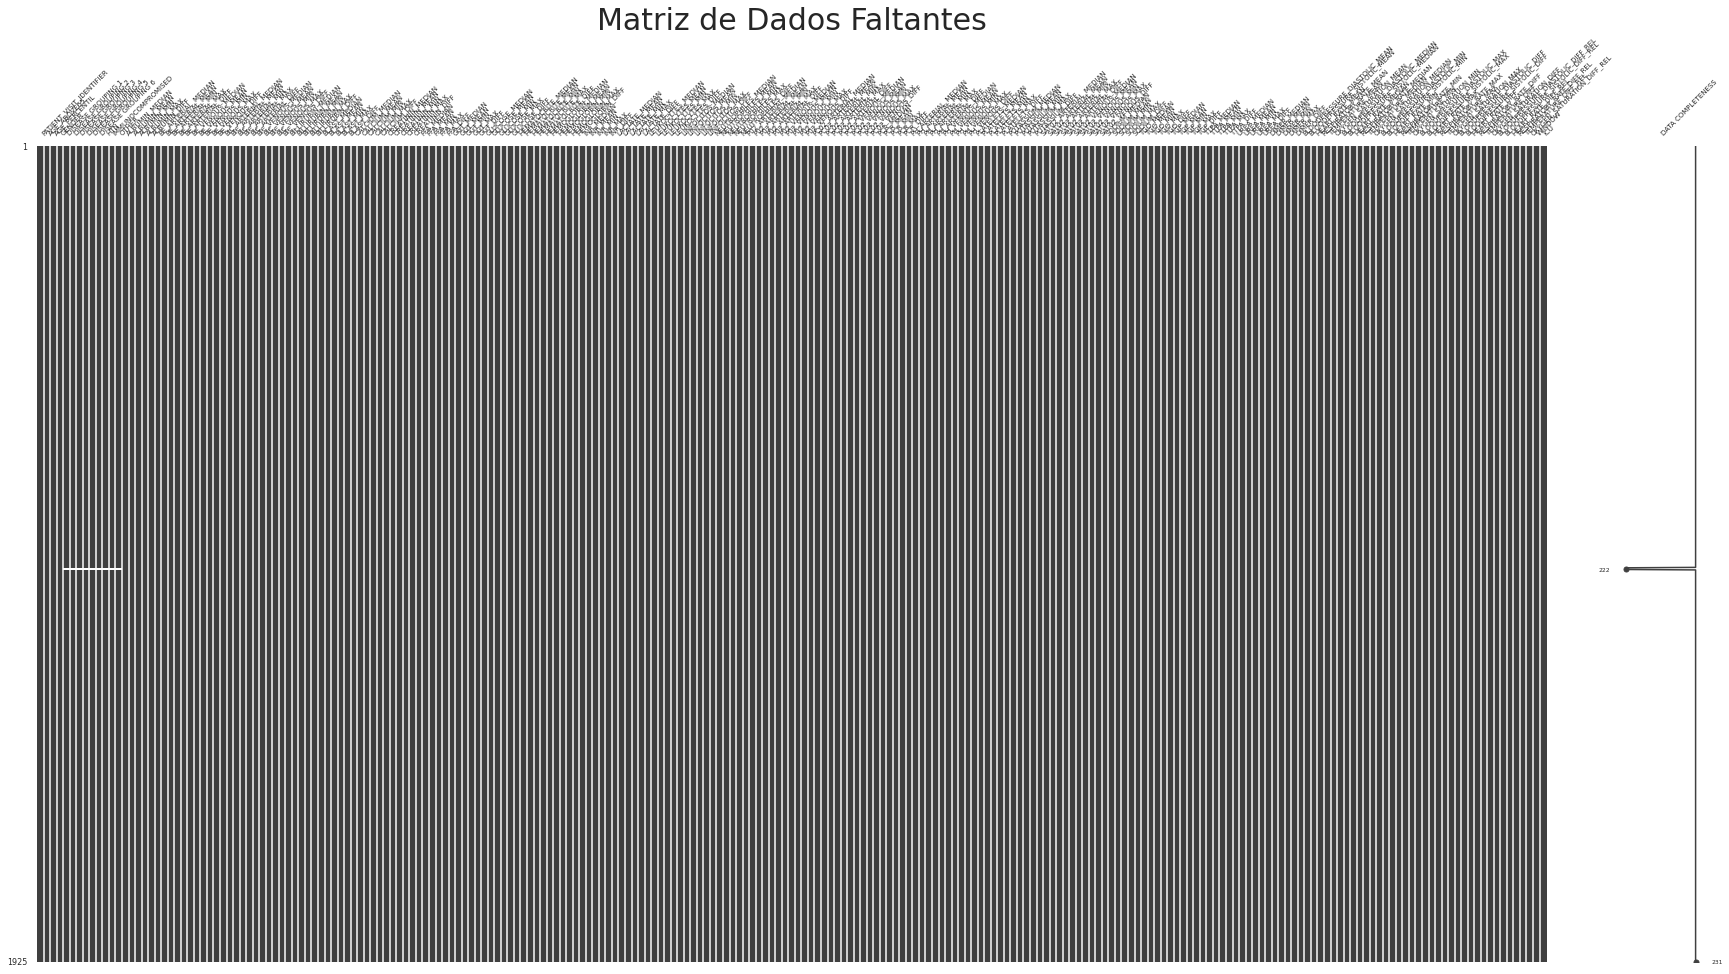

In [183]:
exibe_matriz_faltantes(dados_preenchido_sirios_libanes)

Ainda existem linhas com valores NaN

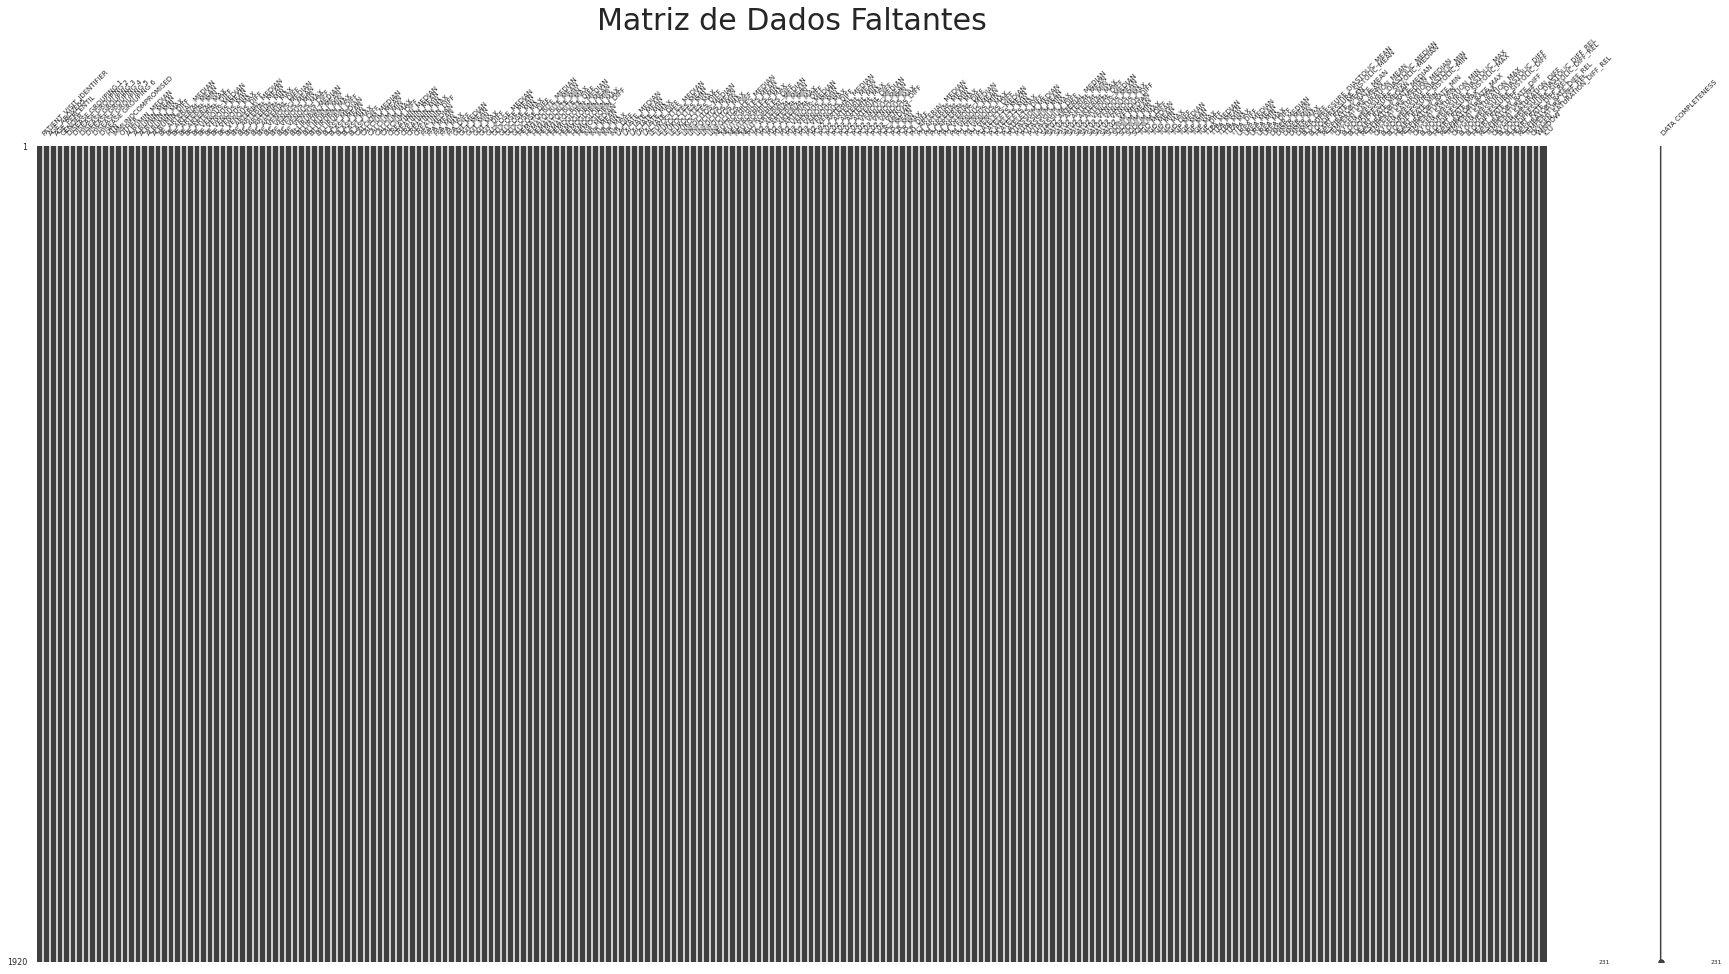

In [184]:
dados_preenchido_sirios_libanes = dados_preenchido_sirios_libanes.dropna()
exibe_matriz_faltantes(dados_preenchido_sirios_libanes)

In [185]:
dados_preenchido_sirios_libanes.isna().sum() 

PATIENT_VISIT_IDENTIFIER      0
AGE_ABOVE65                   0
AGE_PERCENTIL                 0
GENDER                        0
DISEASE GROUPING 1            0
                             ..
RESPIRATORY_RATE_DIFF_REL     0
TEMPERATURE_DIFF_REL          0
OXYGEN_SATURATION_DIFF_REL    0
WINDOW                        0
ICU                           0
Length: 231, dtype: int64

Após a aplicação da função dropna() não existem mais dados com valores faltantes.

##5.2 Análise da entrada dos pacientes na UTI

Os pacientes que entraram na UTI na janela de tempo de 0-2 (coluna **WINDOW**) não são interessantes para serem utilizados pelos algoritmos de *Machine Learning*, que objetivam prever a entrada de um paciente a partir das informações de diagnóstico, pois os dados do paciente que entrou na UTI no tempo 0-2 se referem a sua estádia na UTI, e não nos momentos anteriores a sua entrada **[4]**. 

Portanto, para os pacientes que tiverem com valor 0-2 na coluna **WINDOW** e valor 1 na coluna **ICU** serão retirados.

In [186]:
pacientes_a_remover = dados_preenchido_sirios_libanes.query("WINDOW == '0-2' and ICU == 1")['PATIENT_VISIT_IDENTIFIER'].values
dados_preenchido_sirios_libanes.query("WINDOW == '0-2' and ICU == 1")['PATIENT_VISIT_IDENTIFIER'].values

array([  1,  17,  27,  41,  47,  48,  54,  62,  85,  90, 104, 106, 109,
       117, 144, 176, 202, 206, 226, 233, 239, 261, 270, 282, 286, 306,
       315, 329, 359, 362, 366, 379])

In [187]:
len(dados_preenchido_sirios_libanes.query("WINDOW == '0-2' and ICU == 1")['PATIENT_VISIT_IDENTIFIER'].values)

32

32 registros de pacientes com valor 0-2 na coluna **WINDOW** e valor 1 na coluna **ICU**.

In [188]:
dados_para_machine_learn_sirios_libanes = dados_preenchido_sirios_libanes.query("PATIENT_VISIT_IDENTIFIER not in @pacientes_a_remover")
dados_para_machine_learn_sirios_libanes.describe() 

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1760.000000,1760.000000,1760.000000,1760.00000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,...,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,192.818182,0.457386,0.380682,0.11250,0.026136,0.101705,0.021591,0.132955,0.049432,0.212500,0.163636,0.828977,0.517913,0.517913,0.517913,0.517913,-1.0,-0.958386,-0.958386,-0.958386,-0.958386,-1.0,-0.926916,-0.926916,-0.926916,-0.926916,-1.0,-0.306430,-0.306430,-0.306430,-0.306430,-1.0,-0.305377,-0.305377,-0.305377,-0.305377,-1.0,-0.945935,-0.945935,-0.945935,...,-0.955277,-0.955277,-1.0,-0.073908,-0.339631,-0.267838,-0.458545,0.067973,0.747996,-0.078023,-0.344698,-0.270867,-0.452606,0.064864,0.751914,-0.001207,-0.187010,-0.243988,-0.469278,0.350887,0.841908,-0.248728,-0.432592,-0.313034,-0.381784,-0.017968,0.808029,-0.799862,-0.785938,-0.804580,-0.778209,-0.823458,-0.915593,-0.828593,-0.774857,-0.854690,-0.788155,-0.824412,-0.915552,0.201705
std,110.637724,0.498322,0.485692,0.31607,0.159586,0.302345,0.145385,0.339622,0.216829,0.409193,0.370050,0.376636,0.235219,0.235219,0.235219,0.235219,0.0,0.182797,0.182797,0.182797,0.182797,0.0,0.178947,0.178947,0.178947,0.178947,0.0,0.107783,0.107783,0.107783,0.107783,0.0,0.120988,0.120988,0.120988,0.120988,0.0,0.088861,0.088861,0.088861,...,0.125227,0.125227,0.0,0.248552,0.261409,0.241648,0.207736,0.239760,0.119912,0.254493,0.264516,0.247132,0.218765,0.247949,0.119985,0.270201,0.261183,0.260190,0.252147,0.193029,0.236797,0.246389,0.258776,0.274449,0.356890,0.262440,0.132323,0.322680,0.356078,0.324716,0.411909,0.276279,0.247695,0.287696,0.368311,0.240338,0.384405,0.274953,0.248093,0.401387
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

Vamos dividir em dois estes dados data frames, uma com o registro da entrada do paciente, outro com o primeiro registro de pacientes que não entraram na UTI.

In [189]:
pacientes_entrada_UTI = dados_para_machine_learn_sirios_libanes.query("ICU == 1")
pacientes_entrada_UTI = pacientes_entrada_UTI.drop_duplicates(subset=['PATIENT_VISIT_IDENTIFIER'])
pacientes_entrada_UTI

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.339130,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
14,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.463415,-0.463415,-0.463415,-0.463415,-1.0,-0.938950,-0.938950,...,-0.978029,-1.0,-0.181070,-0.551603,-0.280660,-0.543785,0.057292,0.797149,-0.160494,-0.538462,-0.273585,-0.517241,0.107143,0.789474,-0.298969,-0.4500,-0.487179,-0.642857,0.142857,0.878788,-0.247863,-0.351351,-0.149254,-0.454545,0.101449,0.947368,-0.547826,-0.435583,-0.419847,-0.705882,-0.500000,-0.898990,-0.612422,-0.343258,-0.576744,-0.695341,-0.505464,-0.900129,ABOVE_12,1
58,11,1,80th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.978029,-1.0,-0.456790,-0.338462,-0.396226,-0.050847,0.178571,0.736842,-0.456790,-0.338462,-0.396226,-0.034483,0.178571,0.736842,-0.216495,-0.0875,-0.264957,0.071429,0.494505,0.898990,-0.623932,-0.535135,-0.522388,-0.151515,-0.043478,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,1
69,13,0,50th,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.952357,-1.0,-0.316667,-0.463077,-0.562736,-0.386441,0.049107,0.763158,-0.308642,-0.423077,-0.641509,-0.379310,0.107143,0.736842,-0.319588,-0.4125,-0.726496,-0.571429,0.208791,0.818182,-0.247863,-0.459

In [190]:
id_pacientes_nao_entraram_UTI = dados_para_machine_learn_sirios_libanes.groupby(['PATIENT_VISIT_IDENTIFIER']).agg({'ICU': max}).query("ICU == 0").index.values
id_pacientes_nao_entraram_UTI

array([  3,   4,   5,   6,   7,   8,   9,  10,  12,  16,  20,  21,  22,
        23,  25,  26,  30,  32,  33,  34,  35,  42,  43,  45,  46,  49,
        50,  51,  56,  57,  58,  59,  60,  61,  65,  66,  71,  72,  74,
        75,  76,  80,  83,  91,  92,  93,  95,  97,  98, 101, 108, 110,
       112, 114, 115, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131,
       134, 135, 143, 146, 147, 150, 153, 154, 158, 160, 162, 163, 167,
       169, 170, 171, 172, 173, 177, 180, 181, 184, 185, 186, 187, 189,
       190, 195, 196, 197, 198, 200, 204, 205, 208, 210, 211, 216, 221,
       223, 224, 225, 229, 236, 237, 238, 241, 244, 246, 247, 249, 251,
       253, 254, 257, 258, 262, 264, 268, 269, 271, 272, 273, 274, 276,
       277, 279, 280, 283, 284, 290, 293, 294, 295, 296, 298, 299, 300,
       301, 303, 304, 311, 312, 313, 314, 317, 319, 321, 324, 326, 328,
       330, 331, 332, 333, 334, 335, 336, 338, 340, 341, 344, 345, 346,
       348, 349, 350, 351, 353, 354, 355, 356, 365, 368, 369, 37

In [191]:
 pacientes_nao_entraram_UTI = dados_preenchido_sirios_libanes.query("PATIENT_VISIT_IDENTIFIER in @id_pacientes_nao_entraram_UTI")
 pacientes_nao_entraram_UTI

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
15,3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,...,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
16,3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,...,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
17,3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,...,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
18,3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,...,-0.978029,-1.0,-0.407407,-0.538462,-0.547170,-0.525424,-0.107143,0.578947,-0.407407,-0.538462,-0.547170,-0.517241,-0.107143,0.578947,-0.175258,-0.2500,-0.401709,-0.428571,0.318681,0.838384,-0.589744,-0.675676,-0.641791,-0.575758,-0.275362,0.578947,-1.000000,-1.000000,-1.

Vamos verificar quantos pacientes entraram ou não na UTI:

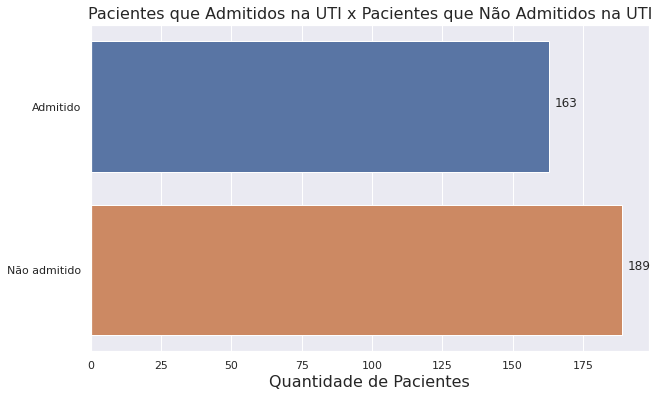

In [192]:
count_admitidos_UTI = dados_para_machine_learn_sirios_libanes.groupby(['PATIENT_VISIT_IDENTIFIER']).agg({'ICU': max})
dict_UTI = {0: "Não admitido", 1:"Admitido"}
count_admitidos_UTI['ICU'] = count_admitidos_UTI['ICU'].map(dict_UTI)

plot_countplot_horizontal(count_admitidos_UTI, 'ICU', 'Pacientes que Admitidos na UTI x Pacientes que Não Admitidos na UTI', 
                          "Quantidade de Pacientes",None)


Temos 163 pacientes admitidos na UTI, 189 não admitidos, totalizando 352 pacientes.

In [193]:
total_pacientes = 163 + 189
total_pacientes

352

 As colunas categoricas contêm informações de:
 - Doenças pré-existentes, 9 colunas: **'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED', 'OTHER'**;
 - Idade acima de 65 anos: **AGE_ABOVE65**; 
 - categoria de idade: **AGE_PERCENTIL**; 
 - Gênero: **GENDER**;
 - E id do pacciente: **PATIENT_VISIT_IDENTIFIER.**

 Vamos análisar as informações com valores verdadeiros ou falsos, relacionados com admissão da UTI ou Não Admissão da UTI, as informações são estas:  **'AGE_ABOVE65', 'GENDER', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN','IMMUNOCOMPROMISED', 'OTHER'**;


###**5.2.1 Análise-Dados Categoricos Pacientes Admitidos na UTI**

In [194]:
dados_categoricos_verdadeiro_falso_admitido_UTI = pacientes_entrada_UTI[['PATIENT_VISIT_IDENTIFIER','AGE_ABOVE65', 'GENDER', 'DISEASE GROUPING 1', 
                                                                         'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 
                                                                         'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN',
                                                                         'IMMUNOCOMPROMISED', 'OTHER']]
dados_categoricos_verdadeiro_falso_admitido_UTI = dados_categoricos_verdadeiro_falso_admitido_UTI.drop_duplicates(subset=['PATIENT_VISIT_IDENTIFIER'])

dados_categoricos_verdadeiro_falso_admitido_UTI = dados_categoricos_verdadeiro_falso_admitido_UTI.drop(columns=['PATIENT_VISIT_IDENTIFIER'], axis = 1 )

dados_categoricos_verdadeiro_falso_admitido_UTI

,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER
4,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
14,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
58,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
72,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1861,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1866,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1882,1,0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1904,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [195]:
df_categorico_admitido_UTI = constroi_df_categorico(dados_categoricos_verdadeiro_falso_admitido_UTI)
df_categorico_admitido_UTI

,Apresenta,Nao_apresenta
AGE_ABOVE65,100.0,63.0
GENDER,52.0,111.0
DISEASE GROUPING 1,23.0,140.0
DISEASE GROUPING 2,10.0,153.0
DISEASE GROUPING 3,27.0,136.0
DISEASE GROUPING 4,8.0,155.0
DISEASE GROUPING 5,34.0,129.0
DISEASE GROUPING 6,11.0,152.0
HTN,55.0,108.0
IMMUNOCOMPROMISED,33.0,130.0


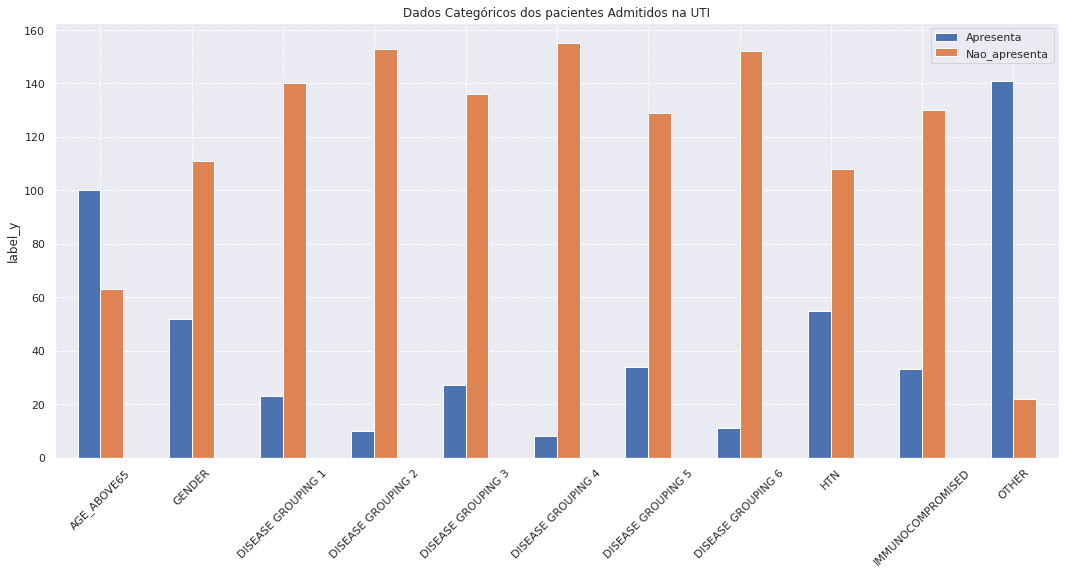

In [196]:
plot_dados_categorigos(df_categorico_admitido_UTI, 'Dados Categóricos dos pacientes Admitidos na UTI', 'Quantitativo')

Entre os dados categórigos, presume-se que o valor 1 tem valor positivo, isto é, "*Apresenta*" a informação da váriavel, e o valor 0 é negativo, isto é,  "*Não apresenta*" aquela informação para a váriavel.

O campo **AGE_ABOVE65** representa o paciente com idade acima de 65 anos. Verifica-se que estes pacientes tiveram uma quantitativo maior de admissões na UTI, do que os menores de 65 anos.

Em relação a variável **GENDER**, gênero, não é possível identificar qual , masculino ou feminino, é mais admitido na UTI, não há essa informação, porém pode-se verificar que um gênero "*Apresnta*", valor 1, é mais internado que outro.


Aos grupo de doenças pré-existentes **DISEASE GROUPING** do **1** ao **6**, os pacientes que apresentaram esta caracteristica que foram admitidos na UTI, estavam em menor número em relação a aqueles que não a apresentaram.

Para os campos **HTN** (Hipertensão ) e **IMMUNOCOMPROMISED** (Imunocomprometido), os pacientes que apresentavam foram minoria em relação aos que não as apresentaram, para serem internados na UTI

A variável **OTHER**, o qual o significado não foi encontrato, demonstra os pacientes que apresentam esta característica, foram em em sua maioria admitidos na UTI, em relação aqueles que não apresentam.

###**5.2.1.1 Análise-Dados Categoricos Pacientes Não Admitidos na UTI**

In [197]:
dados_categoricos_verdadeiro_falso_NAO_admitido_UTI = pacientes_nao_entraram_UTI[['AGE_ABOVE65', 'GENDER', 'DISEASE GROUPING 1', 
                                                                                  'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 
                                                                                  'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN',
                                                                                  'IMMUNOCOMPROMISED', 'OTHER','WINDOW']].query("WINDOW == '0-2' ")
dados_categoricos_verdadeiro_falso_NAO_admitido_UTI = dados_categoricos_verdadeiro_falso_NAO_admitido_UTI.drop(['WINDOW'], axis =1)
dados_categoricos_verdadeiro_falso_NAO_admitido_UTI

,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER
15,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
20,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
35,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1885,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1890,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1905,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1915,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [198]:
df_categorico_NAO_admitido_UTI = constroi_df_categorico(dados_categoricos_verdadeiro_falso_NAO_admitido_UTI)
df_categorico_NAO_admitido_UTI

,Apresenta,Nao_apresenta
AGE_ABOVE65,61.0,128.0
GENDER,82.0,107.0
DISEASE GROUPING 1,16.0,173.0
DISEASE GROUPING 2,2.0,187.0
DISEASE GROUPING 3,11.0,178.0
DISEASE GROUPING 4,1.0,188.0
DISEASE GROUPING 5,17.0,172.0
DISEASE GROUPING 6,9.0,180.0
HTN,24.0,165.0
IMMUNOCOMPROMISED,26.0,163.0


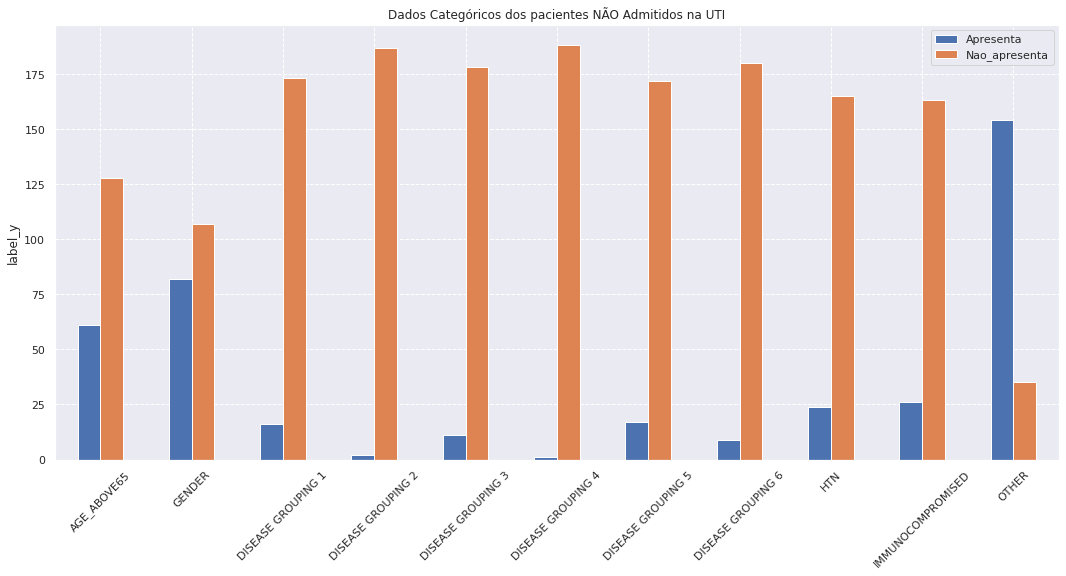

In [199]:
plot_dados_categorigos(df_categorico_NAO_admitido_UTI, 'Dados Categóricos dos pacientes NÃO Admitidos na UTI', 'Quantitativo')

Na análise dos pacientes que **Não Foram admitidos na UTI** :

O campo **AGE_ABOVE65** representa o paciente com idade acima de 65 anos. Pode-se verificar que pacientes não idosos, menores de 65 anos, são frequentemente menos admitidos na UTI

Em relação a variável **GENDER**, gênero, não é possível identificar qual , masculino ou feminino, é mais não admitido na UTI, não há essa informação, mas os valores se aproxima neste quesito.

Os grupo de doenças pré-existentes **DISEASE GROUPING** do **1** ao **6**, o quantitativo de pacientes que não apresentam esta característica é muito menor do que os que apresentam, isto é, os que não apresentam a doença geralmente não são admitdos na UTI, os que apresentam também não são, mas com menor frequencia.

Para os campos **HTN** (Hipertensão ) e **IMMUNOCOMPROMISED** (Imunocomprometido), os pacientes que apresentavam foram minoria em relação aos que não as apresentaram, para NÃO serem internados na UTI

A variável **OTHER**, o qual o significado não é disponível, demonstra que os pacientes que apresentam está característica, tem um quantitativo maior daqueles que não apresentam, em relação a não ser admitido na UTI.

###**5.2.1.2 Análise dos comparativos de informações Categoricas dos Pacientes**
Entre os dados catecórigos de pacientes em relação aos que foram admitidos nas UTI ou não, os grupos de doenças prévias não eram relevantes para esta tomada de decisão, nem as informações de hipertensão e imunocomprometidomento.
A varíavel de idade acima de 65 anos, se mostrou relevante, como verificado, a maioria dos pacientes que apresentavam esta característica foram admitidos na UTI, e a maioria dos que não a apresentavam estão no grupo que não foram admitidos na UTI. 

O mesmo ocorre com o campo **OTHER**, embora não seja especificado qual o significado desta informação, apenas supõem-se que sejam fatores não apresentados pornenhuma das variáveis do conjunto.

###**5.2.2 Análise- Informações de valores contínuos**
Para isolar os dados contínuos e comparar pacientes que entraram ou não na UTI, vamos agrupar os participantes que entraram na UTI pela coluna **WINDOW** valor '0-2', junto com os participantes que não foram admitidos na UTI.

A intenção de escolher o valor da mediana para análise (*MEDIAN*) dos dados categórigos, deve-se a presunção de intuir que a informação da maior parte dos dados pode influenciar na decisão de se admitir ou não um paciente na UTI, isto se um conjunto maior ou menor daquela varíavel poderá acarretar em uma decisão.

Os dados foram separados em duas bases, uma para pacientes admitidos na UTI, outra para NÃO admitidos na UTI, e plotados seu gráficos.


In [200]:
dados_para_machine_learn_sirios_libanes = dados_para_machine_learn_sirios_libanes.groupby("PATIENT_VISIT_IDENTIFIER").apply(prepare_window)
dados_para_machine_learn_sirios_libanes.head()

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
3,15,3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,...,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,4,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.935113,-0.935113,...,-1.000000,-1.0,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.333333,-0.153846,0.160377,-0.586207,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0

In [201]:
continuos_adm_UTI = prepara_continuos(dados_para_machine_learn_sirios_libanes.query(" ICU == 1 "))
continuos_adm_UTI.sample(5)

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
52,1,70th,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.643979,-0.643979,-0.643979,-0.643979,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.219512,-0.219512,-0.219512,-0.219512,-1.0,-0.964417,-0.964417,-0.964417,...,-0.920056,-1.0,0.037037,-0.230769,-0.471698,-0.254237,0.250000,0.684211,0.037037,-0.230769,-0.471698,-0.241379,0.250000,0.684211,0.195876,0.0000,-0.333333,-0.142857,0.538462,0.878788,-0.282051,-0.459459,-0.582090,-0.333333,0.014493,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
118,1,Above 90th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.421053,0.421053,0.421053,0.421053,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.780105,-0.780105,-0.780105,-0.780105,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.219512,-0.219512,-0.219512,-0.219512,-1.0,-0.984301,-0.984301,-0.984301,...,-0.976256,-1.0,-0.283951,-0.301538,-0.456604,-0.579661,-0.064286,0.821053,-0.234568,-0.430769,-0.547170,-0.655172,-0.107143,0.842105,-0.134021,-0.1625,-0.401709,-0.571429,0.318681,0.919192,-0.470085,-0.372973,-0.462687,-0.515152,-0.188406,0.842105,-0.913043,-0.742331,-0.816794,-0.823529,-0.928571,-0.979798,-0.922128,-0.718121,-0.836524,-0.794355,-0.928175,-0.980232,0-2,1
4,1,60th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.895288,-0.895288,-0.895288,-0.895288,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.268293,-0.268293,-0.268293,-0.268293,-1.0,-0.953951,-0.953951,-0.953951,...,-0.992214,-1.0,-0.234568,-0.553846,-0.641509,-0.389831,-0.178571,0.789474,-0.234568,-0.553846,-0.641509,-0.379310,-0.178571,0.789474,-0.030928,-0.2625,-0.487179,-0.285714,0.274725,0.919192,-0.470085,-0.686486,-0.716418,-0.454545,-0.333333,0.789474,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
84,1,70th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,...,-0.978029,-1.0,-0.530864,-0.784615,0.132075,-0.050847,0.464286,0.315789,-0.530864,-0.784615,0.132075,-0.034483,0.464286,0.315789,-0.278351,-0.4500,0.213675,0.071429,0.670330,0.737374,-0.675214,-0.848649,-0.104478,-0.151515,0.188406,0.315789,-1.000000,-1.000

In [202]:
continuos_N_adm_UTI = prepara_continuos(dados_para_machine_learn_sirios_libanes.query(" ICU == 0 "))
continuos_N_adm_UTI.sample(5)

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
50,0,40th,0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,...,-0.978029,-1.0,0.580247,0.230769,-0.226415,-0.593220,0.750000,0.631579,0.580247,0.230769,-0.226415,-0.586207,0.750000,0.631579,0.649485,0.3750,-0.111111,-0.500000,0.846154,0.858586,0.094017,-0.135135,-0.388060,-0.636364,0.420290,0.631579,-1.000000,-1.00000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,0-2,0
35,0,30th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,...,-0.978029,-1.0,-0.283951,-0.676923,-0.396226,-0.457627,0.214286,0.894737,-0.283951,-0.676923,-0.396226,-0.448276,0.214286,0.894737,-0.072165,-0.3625,-0.264957,-0.357143,0.516484,0.959596,-0.504274,-0.772973,-0.522388,-0.515152,-0.014493,0.894737,-1.000000,-1.00000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,0-2,0
12,1,60th,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.821990,-0.821990,-0.821990,-0.821990,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.073171,-0.073171,-0.073171,-0.073171,-1.0,-0.938950,-0.938950,-0.938950,...,-0.978645,-1.0,-0.037037,0.076923,-0.377358,-0.593220,-0.107143,0.947368,-0.037037,0.076923,-0.377358,-0.586207,-0.107143,0.947368,0.134021,0.2500,-0.247863,-0.500000,0.318681,0.979798,-0.333333,-0.243243,-0.507463,-0.636364,-0.275362,0.947368,-1.000000,-1.00000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,0-2,0
70,1,Above 90th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.866039,-0.866039,-0.866039,...,-0.758008,-1.0,-0.654321,-0.548718,-0.314465,-0.525424,-0.119048,0.771930,-0.901235,-0.553846,-0.339623,-0.517241,-0.035714,0.842105,-0.587629,-0.2625,-0.213675,-0.428571,0.208791,0.858586,-0.418803,-0.675676,-0.417910,-0.575758,-0.217391,0.842105,-0.478261,-0.98773,-0.938931,-1.0,-0.833333,-0.9191

In [203]:
df_median_continuos_UTI = continuos_adm_UTI.loc[:, continuos_adm_UTI.columns.str.contains('MEDIAN')]
df_median_continuos_UTI.sample(5)

,ALBUMIN_MEDIAN,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,BILLIRUBIN_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,HEMOGLOBIN_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,NEUTROPHILES_MEDIAN,P02_ARTERIAL_MEDIAN,P02_VENOUS_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_ARTERIAL_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN
28,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.973836,-1.0,0.357143,-0.916490,-0.742004,-0.958528,-0.891993,0.018868,-0.048780,-0.932246,1.0,-0.660487,-0.651452,-0.738295,-0.170732,-0.704142,-0.77931,-0.754601,-0.876371,0.234043,0.363636,-0.588785,-0.481481,0.939394,0.345679,-0.200000,-0.995428,-0.986662,-0.825613,-0.898795,-0.944648,-0.074074,0.261538,-0.367925,0.103448,0.250000,0.736842
47,0.605263,-1.0,-1.0,-0.317073,-0.414634,-0.938950,-1.0,0.357143,-0.782024,-0.742004,-0.958528,-0.836127,-0.245283,-0.304878,-0.957340,1.0,-0.765160,-0.836100,-0.845538,-0.170732,-0.928994,-0.77931,-0.742331,-0.887713,0.234043,0.212121,-0.623498,-0.111111,0.939394,-0.753086,-0.371429,-0.996454,-0.997332,-0.869210,-0.816867,-0.866631,-0.111111,0.476923,-0.377358,-0.448276,0.392857,0.947368
39,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.891156,-1.0,0.020408,-0.762208,0.206823,-0.913551,-0.761639,-0.073375,-0.073171,-0.831870,1.0,-0.927385,-0.842324,-0.975990,-0.170732,-0.704142,-0.77931,-0.754601,-0.960302,0.234043,0.363636,-0.684913,-0.666667,0.939394,0.345679,0.028571,-0.997014,-0.977896,-0.787466,-0.522892,-0.978029,-0.407407,-0.538462,-0.264151,-0.517241,-0.178571,0.947368
23,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.970696,-1.0,0.357143,-0.920736,-0.742004,-0.958528,-0.843575,-0.031447,-0.158537,-0.959849,1.0,-0.787563,-0.545643,-0.899960,-0.170732,-0.704142,-0.77931,-0.754601,-0.997353,0.234043,0.363636,-0.206943,-0.666667,0.939394,0.345679,0.028571,-0.995521,-0.984756,-0.846633,-0.898795,-0.976718,0.086420,0.046154,-0.452830,-0.655172,-0.214286,0.789474
155,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.910828,-0.458422,-0.958528,-0.780261,0.014675,-0.097561,-0.959849,1.0,-0.701429,-0.715768,-0.782313,-0.170732,-0.704142,-0.77931,-0.754601,-0.889225,0.234043,0.363636,-0.196262,-0.481481,0.939394,0.345679,0.085714,-0.995428,-0.986662,-0.846633,-0.812048,-0.978029,-0.333333,-0.446154,-0.320755,-0.655172,-0.107143,0.789474


In [204]:
df_median_continuos_Nao_UTI = continuos_N_adm_UTI.loc[:, continuos_adm_UTI.columns.str.contains('MEDIAN')]
df_median_continuos_Nao_UTI.sample(5)

,ALBUMIN_MEDIAN,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,BILLIRUBIN_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,HEMOGLOBIN_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,NEUTROPHILES_MEDIAN,P02_ARTERIAL_MEDIAN,P02_VENOUS_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_ARTERIAL_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN
185,0.605263,-1.0,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.908402,-0.742004,-0.958528,-0.891993,-0.094340,-0.036585,-0.932246,1.0,-0.576284,-0.288382,-0.745098,-0.170732,-0.704142,-0.77931,-0.754601,-0.911153,0.234043,0.363636,-0.295060,-0.481481,0.939394,0.345679,0.066667,-0.995428,-0.986662,-0.858311,-0.879518,-0.978029,-0.209877,-0.261538,-0.188679,-0.724138,-0.107143,0.842105
86,0.605263,-1.0,-0.958115,-0.317073,-0.317073,-0.990581,-1.0,0.357143,-0.920736,-0.742004,-0.958528,-0.843575,-0.421384,-0.524390,-0.959849,1.0,-0.841251,-0.956432,-0.859144,-0.170732,-0.952663,-0.77931,-0.754601,-0.656333,0.234043,0.363636,-0.164219,-0.555556,0.939394,-0.925926,0.028571,-0.997761,-0.993902,-0.846633,-0.898795,-0.731257,-0.654321,-0.446154,0.226415,-0.379310,0.928571,0.736842
75,0.605263,-1.0,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.924982,-0.901919,-0.984813,-0.839851,-0.337526,-0.378049,-0.959849,1.0,-0.867903,-0.759336,-0.914366,-0.170732,-0.704142,-0.77931,-0.754601,-0.861626,0.234043,0.363636,-0.567423,-0.592593,0.939394,0.345679,-0.200000,-0.997387,-0.997332,-0.846633,-0.898795,-0.966927,-0.209877,-0.753846,-0.150943,-0.448276,0.964286,0.684211
23,0.605263,-1.0,-1.000000,-0.317073,-0.317073,-0.941392,-1.0,0.357143,-0.885350,-0.880597,-0.991822,-0.877095,-0.039832,-0.158537,-0.731493,1.0,-0.820394,-0.755187,-0.881553,-0.170732,-0.704142,-0.77931,-0.754601,-0.855577,0.234043,0.363636,-0.596796,-0.481481,0.939394,0.345679,0.066667,-0.994588,-0.995046,-0.792916,-0.831325,-0.963767,0.111111,-0.369231,-0.226415,-0.586207,0.035714,0.631579
172,0.684211,-1.0,-0.916230,-0.317073,-0.268293,-0.966510,-1.0,0.285714,-0.909413,-0.859275,-0.978972,-0.891993,-0.236897,-0.231707,-0.957340,1.0,-0.842024,-0.742739,-0.920368,-0.170732,-0.727811,-0.77931,-0.742331,-0.962571,0.234043,0.363636,-0.540721,-0.777778,0.939394,0.283951,0.085714,-0.994401,-0.983232,-0.831063,-0.850602,-0.976256,0.086420,0.076923,-0.490566,-0.586207,0.214286,0.789474


In [205]:
melt_UTI = melt_continuos(df_median_continuos_UTI)
melt_UTI

,tipo_categoria,id,valor
0,ALBUMIN_MEDIAN,0,0.605263
1,BE_ARTERIAL_MEDIAN,0,-1.000000
2,BE_VENOUS_MEDIAN,0,-1.000000
3,BIC_ARTERIAL_MEDIAN,0,-0.317073
4,BIC_VENOUS_MEDIAN,0,-0.317073
...,...,...,...
6841,BLOODPRESSURE_SISTOLIC_MEDIAN,162,-0.384615
6842,HEART_RATE_MEDIAN,162,-0.320755
6843,RESPIRATORY_RATE_MEDIAN,162,-0.448276
6844,TEMPERATURE_MEDIAN,162,-0.071429


In [206]:
melt_nao_UTI = melt_continuos(df_median_continuos_Nao_UTI)
melt_nao_UTI

,tipo_categoria,id,valor
0,ALBUMIN_MEDIAN,0,-0.263158
1,BE_ARTERIAL_MEDIAN,0,-1.000000
2,BE_VENOUS_MEDIAN,0,-1.000000
3,BIC_ARTERIAL_MEDIAN,0,-0.317073
4,BIC_VENOUS_MEDIAN,0,-0.317073
...,...,...,...
7933,BLOODPRESSURE_SISTOLIC_MEDIAN,188,-0.292308
7934,HEART_RATE_MEDIAN,188,0.056604
7935,RESPIRATORY_RATE_MEDIAN,188,-0.517241
7936,TEMPERATURE_MEDIAN,188,0.535714


###**5.2.2.1 Valores Contínuos - Pacientes Admitidos na UTI**

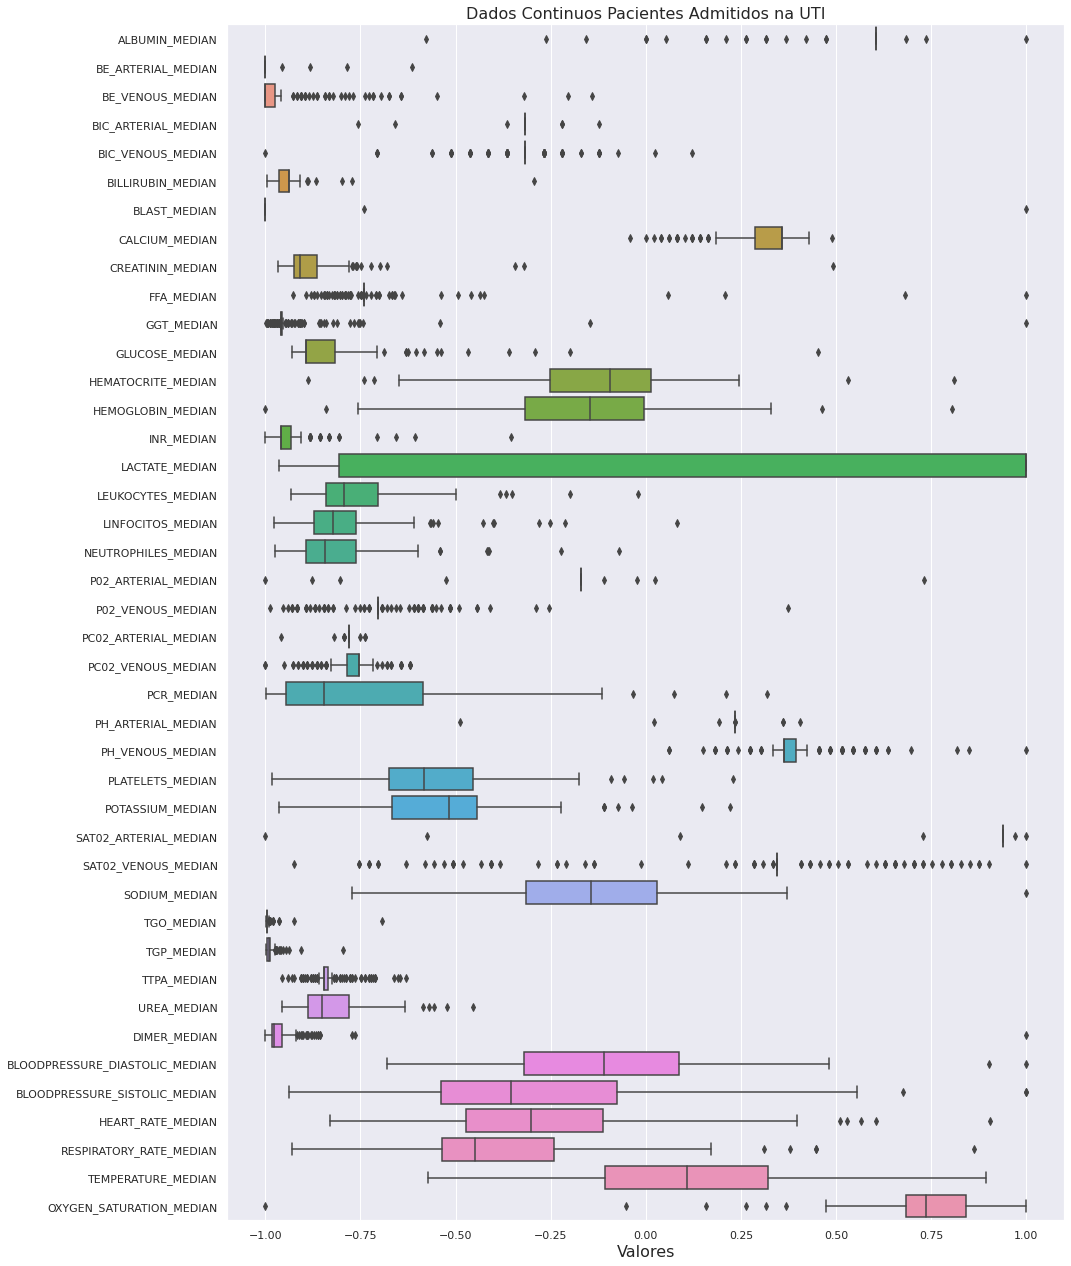

In [207]:
barplot_continuos(melt_UTI, 'Dados Continuos Pacientes Admitidos na UTI', 'Valores', None)

O dado contínuo que mais se destaca é o **LACTOSE_MEDIAN** com valores próximos ao 1, pressupõe-se, possivelmente que a maior parte dos pacientes admitidos na UTI estão com valores positivos neste indicador.

###**5.2.2.2 Valores Contínuos - Pacientes NÃO Admitidos na UTI**

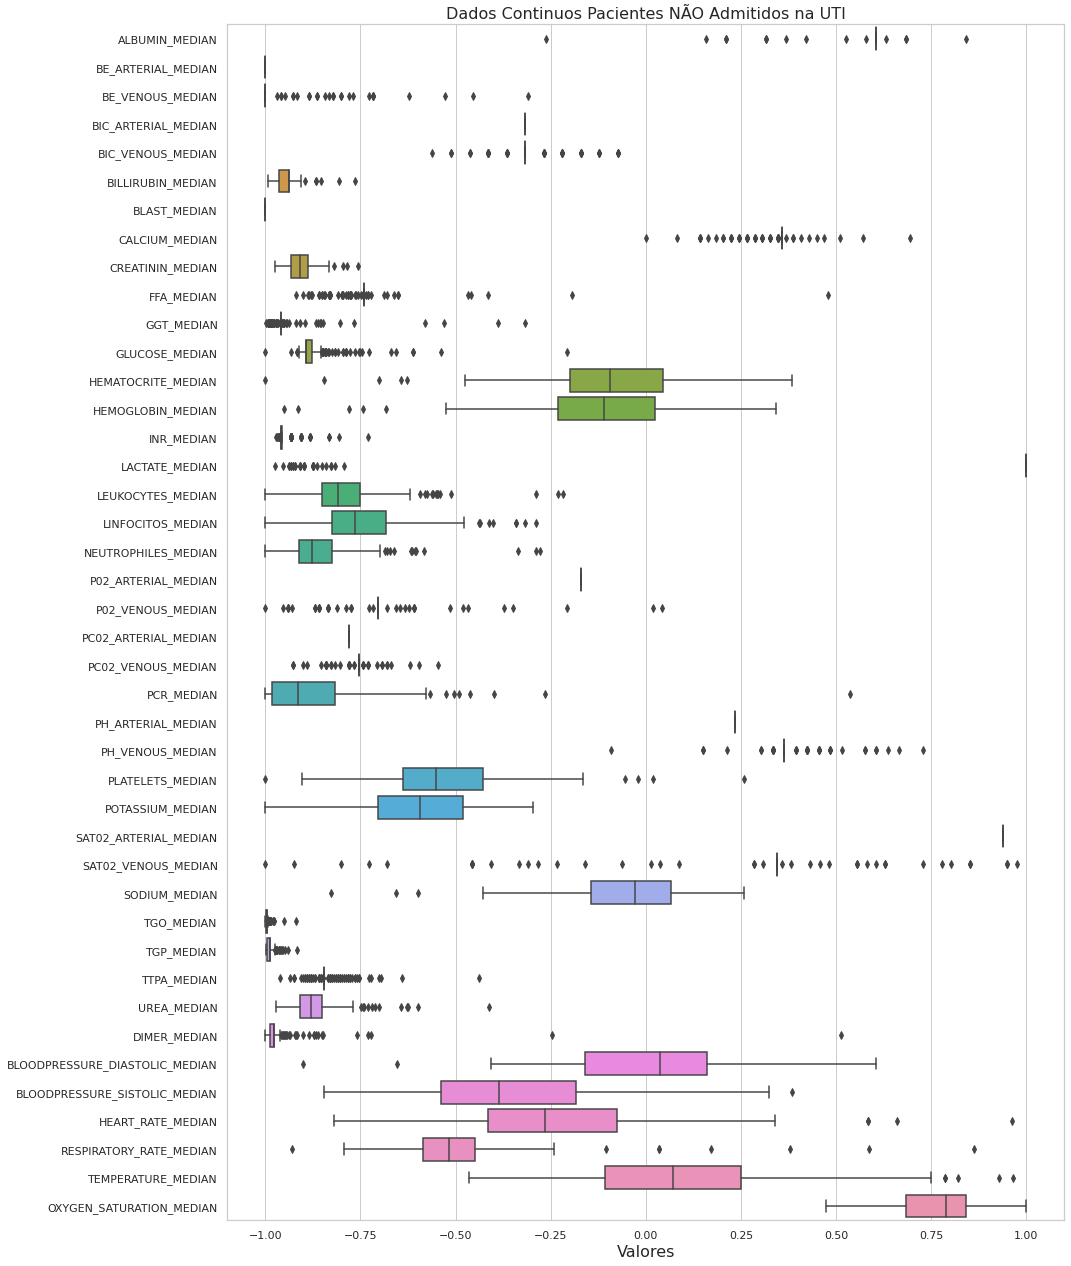

In [208]:
barplot_continuos(melt_nao_UTI, 'Dados Continuos Pacientes NÃO Admitidos na UTI', 'Valores', None)

No caso dos pacientes que NÃO são admitidos na UTI, também o dado contínuo que mais se destaca é o **LACTOSE_MEDIAN** com valores próximos a -1.

###**5.2.2.3 Análise - Pacientes NÃO Admitidos na UTI X Pacientes Admitidos na UTI** 

O dado que mais se destacou foi **LACTOSE_MEDIAN** apresentado valores próximos a 1, nos casos de pacientes admitidos na UTI, e próximos a -1 nos caos de pacientes não admitidos na UTI, demosntrando uma significativa diferença.

A maioria dos outras variáveis com valores contínuos não apresentou diferenças relevantes para considerar que possa influenciar signitificativamente na decisão se admitir um paciente na UTI ou não.

#**6. Aplicações de Algoritmos de Machine Learning**
Vamos aplicar os algoritmos de *Machine Learning Logistic Regression, Random Forest, Extra Tree Classifier, Gradient Boosting* para tentar predizer, a partir dos dados de pacientes se ele foi admitido na UTI ou não.


##**6.1 Tratando a base de dados**
Os dados do Hospoital Sirio Libanês estão quase preparados para serem alvos da aplicaçaõ de Algoritmos de *Machine Learning*, vale uma revisada.


In [209]:
dados_para_machine_learn_sirios_libanes.sample(5)

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
307,1535,307,1,70th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.978029,-1.0,-0.061728,-0.076923,-0.037736,-0.254237,-0.035714,0.894737,-0.061728,-0.076923,-0.037736,-0.241379,-0.035714,0.894737,0.113402,0.1250,0.059829,-0.142857,0.362637,0.959596,-0.350427,-0.351351,-0.238806,-0.333333,-0.217391,0.894737,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,0-2,1
116,580,116,1,Above 90th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.658537,-0.658537,-0.658537,-0.658537,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.978029,-1.0,-0.432099,-0.692308,0.264151,-0.355932,0.107143,-0.052632,-0.432099,-0.692308,0.264151,-0.344828,0.107143,-0.052632,-0.195876,-0.3750,0.333333,-0.357143,0.450549,0.595960,-0.606838,-0.783784,0.000000,-0.333333,-0.101449,-0.052632,-1.0,-1.0,-1.0,-0.823529,-1.0,-1.0,-1.0,-1.0,-1.0,-0.839496,-1.0,-1.0,0-2,1
11,55,11,1,80th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.977720,-1.0,0.037037,-0.246154,-0.415094,-0.389831,0.785714,0.684211,0.037037,-0.246154,-0.415094,-0.379310,0.785714,0.684211,0.195876,-0.0125,-0.282051,-0.285714,0.868132,0.878788,-0.282051,-0.470270,-0.537313,-0.454545,0.449275,0.684211,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,0-2,1
294,1470,294,1,90th,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.960230,-0.960230,...,-0.949119,-1.0,0.432099,0.323077,-0.094340,-0.525424,-0.107143,0.842105,0.432099,0.323077,-0.094340,-0.517241,-0.107143,0.842105,0.525773,0.4500,0.008547,-0.428571,0.318681,0.939394,-0.008547,-0.070270,-0.283582,-0.575758,-0.275362,0.842105,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00000

Ele possui duas colunas com o campo **"PATIENT_VISIT_IDENTIFIER"**, um deles é *index*, ou outro é um *index* de **level 1**, além de apresentar dados categórigos não númericos.

In [210]:
dados_para_machine_learn_sirios_libanes = dados_para_machine_learn_sirios_libanes.drop(['PATIENT_VISIT_IDENTIFIER'], axis=1)
dados_para_machine_learn_sirios_libanes = dados_para_machine_learn_sirios_libanes.reset_index()
dados_para_machine_learn_sirios_libanes = dados_para_machine_learn_sirios_libanes.drop(['level_1'], axis=1)
dados_para_machine_learn_sirios_libanes.sample(5)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
145,160,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.978029,-1.0,0.308642,0.076923,0.584906,-0.457627,0.250000,0.789474,0.308642,0.076923,0.584906,-0.448276,0.250000,0.789474,0.422680,0.2500,0.623932,-0.357143,0.538462,0.919192,-0.094017,-0.243243,0.253731,-0.515152,0.014493,0.789474,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0-2,0
222,244,1,60th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.977335,-1.0,-0.012346,-0.292308,-0.283019,-0.457627,0.142857,0.842105,-0.012346,-0.292308,-0.283019,-0.448276,0.142857,0.842105,0.154639,-0.0500,-0.162393,-0.357143,0.472527,0.939394,-0.316239,-0.502703,-0.432836,-0.515152,-0.072464,0.842105,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0-2,0
217,238,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.986395,-0.986395,...,-0.978029,-1.0,-0.061728,-0.307692,-0.641509,-0.661017,0.214286,0.842105,-0.061728,-0.307692,-0.641509,-0.655172,0.214286,0.842105,0.113402,-0.0625,-0.487179,-0.571429,0.516484,0.939394,-0.350427,-0.513514,-0.716418,-0.696970,-0.014493,0.842105,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0-2,0
292,320,1,Above 90th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.512195,-0.512195,-0.512195,-0.512195,-1.0,-0.986395,-0.986395,...,-0.890683,-1.0,-0.506173,-0.430769,-0.094340,-0.254237,-0.035714,0.789474,-0.506173,-0.430769,-0.094340,-0.241379,-0.035714,0.789474,-0.257732,-0.1625,0.008547,-0.142857,0.362637,0.919192,-0.658120,-0.600000,-0.283582,-0.333333,-0.217391,0.789474,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0-2,1
177,193,1,90th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.717277,-0.717277,-0.7172

In [211]:
dados_para_machine_learn_sirios_libanes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 635.4+ KB


In [212]:
dados_para_machine_learn_sirios_libanes.select_dtypes(include='object').sample(5)

,AGE_PERCENTIL,WINDOW
280,70th,0-2
321,30th,0-2
69,80th,0-2
4,10th,0-2
187,60th,0-2


Vamos categorizar a coluna **AGE_PERCENTIL** e descartar a coluna **WINDOW**, pois esta última não terá serventia para o *Machine Learning*.

In [213]:
dados_para_machine_learn_sirios_libanes.AGE_PERCENTIL = dados_para_machine_learn_sirios_libanes.AGE_PERCENTIL.astype("category").cat.codes
dados_para_machine_learn_sirios_libanes = dados_para_machine_learn_sirios_libanes.drop(['WINDOW'], axis=1)
dados_para_machine_learn_sirios_libanes.sample(5)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
242,265,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.976975,-0.976975,...,-0.964306,-0.964306,-1.0,0.456790,0.189744,0.113208,0.016949,0.464286,0.614035,0.382716,0.261538,0.113208,0.034483,0.571429,0.578947,0.484536,0.2250,0.196581,0.142857,0.538462,0.838384,0.111111,-0.113514,-0.119403,-0.090909,0.275362,0.684211,-0.843478,-0.828221,-1.0,-1.0,-0.785714,-0.959596,-0.897921,-0.86428,-1.0,-1.0,-0.795326,-0.958315,1
268,294,1,8,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.960230,-0.960230,...,-0.949119,-0.949119,-1.0,0.432099,0.323077,-0.094340,-0.525424,-0.107143,0.842105,0.432099,0.323077,-0.094340,-0.517241,-0.107143,0.842105,0.525773,0.4500,0.008547,-0.428571,0.318681,0.939394,-0.008547,-0.070270,-0.283582,-0.575758,-0.275362,0.842105,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.00000,-1.0,-1.0,-1.000000,-1.000000,0
316,345,1,9,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.948718,-0.948718,...,-0.978029,-0.978029,-1.0,0.580247,-0.230769,-0.188679,-0.525424,-0.035714,0.842105,0.580247,-0.230769,-0.188679,-0.517241,-0.035714,0.842105,0.649485,0.0000,-0.076923,-0.428571,0.362637,0.919192,0.094017,-0.459459,-0.358209,-0.575758,-0.217391,0.894737,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-0.959596,-1.000000,-1.00000,-1.0,-1.0,-1.000000,-0.960463,0
116,130,1,5,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.978029,-0.978029,-1.0,0.333333,-0.076923,-0.377358,-0.661017,-0.214286,0.684211,0.333333,-0.076923,-0.377358,-0.655172,-0.214286,0.684211,0.443299,0.1250,-0.247863,-0.571429,0.252747,0.878788,-0.076923,-0.351351,-0.507463,-0.696970,-0.362319,0.684211,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.00000,-1.0,-1.0,-1.000000,-1.000000,0
301,330,1,9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605

A base de dados está pronta para iniciar a aplicação dos algoritmos de *Machine Learning*

##**6.2 Seleção de Algoritmos de *Machine Learning* e métodos e avaliação**

Vamos utilizar os algoritmos de *Machine Learning*: *LogisticRegression* , *RandomForestClassifier*, *Extra Tree Classifier* e *Gradient Boosting* assim vamos verificar o comportameto destes com a base de dados do Hospital Sírio libânes e verificar os resultados.

In [214]:
modelo_LogisticRegression = LogisticRegression(max_iter=10000)
modelo_RandomForest = RandomForestClassifier(max_depth=20, random_state=0)
modelo_ExtraTrees = ExtraTreesClassifier(max_depth=3, n_estimators=100)
modelo_GradientBoosting = GradientBoostingClassifier(max_depth=3, n_estimators=100)

Destaca-se a descrição da função *exibe_result_modelo_machine_learning* que executa o treinamento, teste, e pontuação de score dos modelos. 

Para diminuir e melhorar aletoriedade vamos utilizar a validação cruzada  *cross validade* **[8]** e a biblioteca *RepeatedStratifiedKFold* **[9]**, em uma quantidade de divisões recomendadas de um número entre 5 e 8, neste caso 8.

Para o número de repetições vamos utilizar 10.

Como métrica de avaliação vamos utilizar a média de AUC do resultante da *Cross Validation*, a Matriz de Confusão, o *Score Accuracy* e o *Classification Report*

### ***Logistic Regression***

Accuracy Score:  0.7159090909090909


Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        47
           1       0.72      0.63      0.68        41

    accuracy                           0.72        88
   macro avg       0.72      0.71      0.71        88
weighted avg       0.72      0.72      0.71        88

 AUC Médio: 0.7116
 Intervalo de confiança: 0.5489 - 0.8743


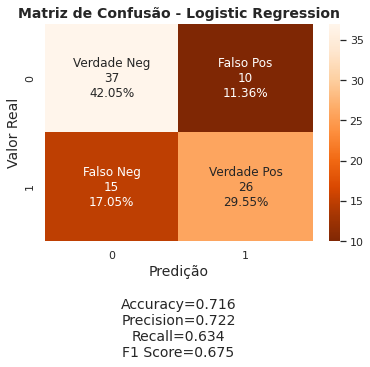

In [215]:
exibe_classification_report_accur_score(modelo_LogisticRegression, dados_para_machine_learn_sirios_libanes)
exibe_result_modelo_machine_learning(modelo_LogisticRegression, dados_para_machine_learn_sirios_libanes, 8, 10, "Logistic Regression" )

### ***Random Forest***

Accuracy Score:  0.7954545454545454


Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.85      0.82        47
           1       0.81      0.73      0.77        41

    accuracy                           0.80        88
   macro avg       0.80      0.79      0.79        88
weighted avg       0.80      0.80      0.79        88

 AUC Médio: 0.7576
 Intervalo de confiança: 0.5906 - 0.9247


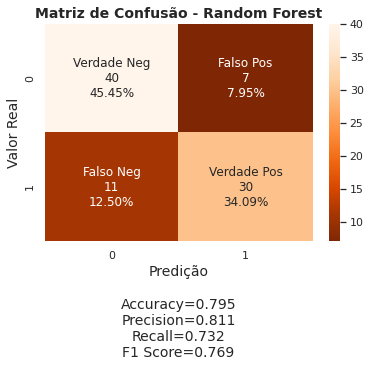

In [216]:
exibe_classification_report_accur_score(modelo_RandomForest, dados_para_machine_learn_sirios_libanes)
exibe_result_modelo_machine_learning(modelo_RandomForest, dados_para_machine_learn_sirios_libanes, 8, 10, "Random Forest" )

### ***Extra Tree***

Accuracy Score:  0.7045454545454546


Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.85      0.75        47
           1       0.76      0.54      0.63        41

    accuracy                           0.70        88
   macro avg       0.72      0.69      0.69        88
weighted avg       0.72      0.70      0.70        88

 AUC Médio: 0.7660
 Intervalo de confiança: 0.5938 - 0.9382


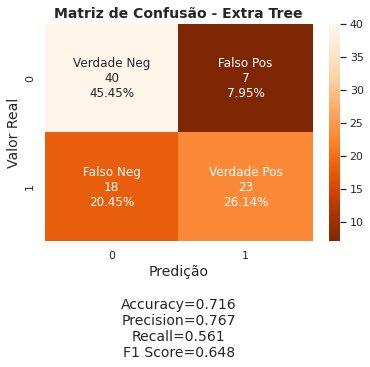

In [217]:
exibe_classification_report_accur_score(modelo_ExtraTrees, dados_para_machine_learn_sirios_libanes)
exibe_result_modelo_machine_learning(modelo_ExtraTrees, dados_para_machine_learn_sirios_libanes, 8, 10, "Extra Tree" )

### ***Gradient Boosting***

Accuracy Score:  0.7613636363636364


Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        47
           1       0.78      0.68      0.73        41

    accuracy                           0.76        88
   macro avg       0.76      0.76      0.76        88
weighted avg       0.76      0.76      0.76        88

 AUC Médio: 0.7647
 Intervalo de confiança: 0.6012 - 0.9282


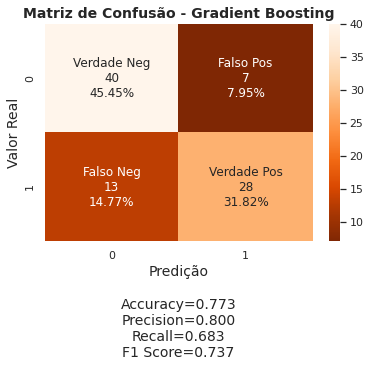

In [218]:
exibe_classification_report_accur_score(modelo_GradientBoosting, dados_para_machine_learn_sirios_libanes)
exibe_result_modelo_machine_learning(modelo_GradientBoosting, dados_para_machine_learn_sirios_libanes, 8, 10, "Gradient Boosting" )

##**6.3 Diminuindo a Multicolinearidade das *features* da base de dados**


Correlação, ou multicolinearidade, ocorre quando variáveis independente em um modelo são correlacionais. A correlação é um problema, devido caracterizar dependência entre variáveis que deveriam ser independentes. Caso o grau de correlação entres as variáveis seja alto o suficiente, isso pode ocasionar problemas no treinamento e interpretação dos resultados. **[11]**

Alguns modelos podem ser impactados negativamente pela correlação, como os de Regressão Linear e de Regressão Logistica, isto ocorre porque variáveis preditivas em um modelo de regressão podem ser linearmente preditas por outras com elevado grau de acurácia. Isto pode ocasionar erros.  Entretanto alguns algoritmos não são afetados por grau de correlação entre as variáveis, como os de **Decision Tree** e **Random Forest**. **[12]**

In [ ]:
dados_para_machine_learn_sirios_libanes.sample(5)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
111,125,1,6,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.643979,-0.643979,-0.643979,-0.643979,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.219512,-0.219512,-0.219512,-0.219512,-1.0,-0.964417,-0.964417,...,-0.920056,-0.920056,-1.0,0.037037,-0.230769,-0.471698,-0.254237,0.250000,0.684211,0.037037,-0.230769,-0.471698,-0.241379,0.250000,0.684211,0.195876,0.0000,-0.333333,-0.142857,0.538462,0.878788,-0.282051,-0.459459,-0.582090,-0.333333,0.014493,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
341,373,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.895288,-0.895288,-0.895288,-0.895288,-1.0,-0.365854,-0.365854,-0.365854,-0.365854,-1.0,-0.268293,-0.268293,-0.268293,-0.268293,-1.0,-0.933019,-0.933019,...,-0.978029,-0.978029,-1.0,-0.456790,-0.576923,0.075472,-0.457627,0.464286,0.644737,-0.456790,-0.576923,0.075472,-0.448276,0.464286,0.631579,-0.257732,-0.4375,0.162393,-0.357143,0.670330,0.858586,-0.589744,-0.567568,-0.149254,-0.515152,0.188406,0.684211,-0.930435,-0.693252,-1.000000,-1.000000,-1.000000,-0.979798,-0.928036,-0.634774,-1.000000,-1.000000,-1.000000,-0.979381,1
286,313,1,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.938950,-0.938950,...,-0.969703,-0.969703,-1.0,0.086420,-0.076923,-0.169811,-0.457627,0.250000,0.578947,0.086420,-0.076923,-0.169811,-0.448276,0.250000,0.578947,0.237113,0.1250,-0.059829,-0.357143,0.538462,0.838384,-0.247863,-0.351351,-0.343284,-0.515152,0.014493,0.578947,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
187,205,1,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.979069,-0.979069,...,-0.939097,-0.939097,-1.0,-0.160494,-0.538462,-0.396226,-0.254237,0.285714,0.684211,-0.160494,-0.538462,-0.396226,-0.241379,0.285714,0.684211,0.030928,-0.2500,-0.264957,-0.142857,0.560440,0.878788,-0.418803,-0.675676,-0.522388,-0.333333,0.043478,0.684211,-1.000000,-1.000000,-1.

In [ ]:
len(dados_para_machine_learn_sirios_libanes.columns)

230

Temos 230 colunas, ou *features*, em nossa base de dados.

In [ ]:
df_machine_learn_sirio_libanes_sem_corr = remove_correlacao(dados_para_machine_learn_sirios_libanes, 0.95)
df_machine_learn_sirio_libanes_sem_corr.sample(5)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_DIFF,FFA_MEDIAN,FFA_DIFF,GGT_MEDIAN,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_DIFF,HEMOGLOBIN_DIFF,...,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_DIFF,TGO_MEDIAN,TGO_DIFF,TGP_MEDIAN,TGP_DIFF,TTPA_MEDIAN,TTPA_DIFF,UREA_MEDIAN,UREA_DIFF,DIMER_MEDIAN,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,RESPIRATORY_RATE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
20,22,1,5,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.821990,-1.0,-0.317073,-1.0,-0.073171,-1.0,-0.938950,-1.0,-1.0,-1.0,0.357143,-1.0,-0.883935,-1.0,-0.773987,-1.0,-0.989486,-1.0,-0.918063,-1.0,0.232704,-1.0,-1.0,...,-1.0,0.151515,-1.0,-0.468625,-1.0,-0.518519,-1.0,0.939394,-1.0,-0.407407,-1.0,0.142857,-1.0,-0.997014,-1.0,-0.991235,-1.0,-0.846633,-1.0,-0.812048,-1.0,-0.978645,-1.0,-0.037037,0.076923,-0.377358,-0.593220,-0.107143,0.947368,-0.500000,-0.333333,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
278,304,1,7,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.970696,-1.0,-1.0,-1.0,0.357143,-1.0,-0.905166,-1.0,-0.829424,-1.0,-0.959112,-1.0,-0.795158,-1.0,-0.283019,-1.0,-1.0,...,-1.0,0.363636,-1.0,-0.415220,-1.0,-0.629630,-1.0,0.939394,-1.0,0.345679,-1.0,-0.142857,-1.0,-0.996268,-1.0,-0.989329,-1.0,-0.846633,-1.0,-0.918072,-1.0,-0.848051,-1.0,0.086420,-0.076923,-0.207547,-0.661017,0.464286,0.526316,-0.571429,-0.247863,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.898990,-1.000000,-0.895787,0
1,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.357143,-1.0,-0.912243,-1.0,-0.742004,-1.0,-0.958528,-1.0,-0.780261,-1.0,0.144654,-1.0,-1.0,...,-1.0,0.363636,-1.0,-0.399199,-1.0,-0.703704,-1.0,0.939394,-1.0,0.345679,-1.0,0.085714,-1.0,-0.995428,-1.0,-0.986662,-1.0,-0.846633,-1.0,-0.836145,-1.0,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.714286,-0.435897,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.747001,-0.961262,1
94,105,1,6,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.968586,-1.0,-0.317073,-1.0,-0.365854,-1.0,-0.962323,-1.0,-1.0,-1.0,0.142857,-1.0,-0.912243,-1.0,-0.825160,-1.0,-0.981308,-1.0,-0.891993,-1.0,-0.278826,-1.0,-1.0,...,-1.0,0.515152,-1.0,-0.874499,-1.0,-0.407407,-1.0,0.939394,-1.0,0.481481,-1.0,-0.371429,-1.0,-0.997387,-1.0,-0.996951,-1.0,-0.896458,-1.0,-0.739759,-1.0,1.000000,-1.0,-0.399177,-0.753846,-0.509434,-0.525424,-0.011905,0.789474,-0.428571,-0.504274,-0.878261,-1.000000,-1.000000,-1.000000,-0.952381,-0.939394,-1.000000,-0.939447,1
319,348,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.780105,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.896389,-1.0,-1.0,-1.0,0.357143,-1.0,-0.891012,-1.0,-0.742004,-1.0,-0.958528,-1.0,-0.795158,-1.0,0.056604,-1.0,-1.0,...,-1.0,0.575758,-1.0,-0.724967,-1.0,-0.740741,-1.0,0.939394,-1.0,0.629630,-1.0,-0.428571,-1.0,-0.994588,-1.0,-0.986662,-1.0,-0.846633,-1.0,-0.739759,-1.0,-0.990903,-1.0,-0.012346,-0.476923

In [ ]:
len(df_machine_learn_sirio_libanes_sem_corr.columns)

100

Com um valor de corte de correlação superior a 0.95, estamos com 100 *features*, em nossa base de dados.

###**6.3.1 Seleção dos melhores modelos para as base de dados do Hospital Sírio Libanês**

Para auxiliar a escolher qual seria o melhor modelo de algoritmo de *Machine learning*, vamos utilizar uma bilbioteca **opensource** chamada PyCaret, uma biblioteca definida como *low code machine learnig* **[10]**

In [ ]:
#result = setup(data=df_machine_learn_sirio_libanes_sem_corr, target=df_machine_learn_sirio_libanes_sem_corr.columns[-1],
               #imputation_type='iterative', session_id=321)
#melhor_modelo = compare_models(n_select=2)
#melhor_modelo
# Para executar novamente basta retirar os comentário.

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7078,0.7555,0.6568,0.7187,0.6758,0.4119,0.4240,0.184
et,Extra Trees Classifier,0.6955,0.7814,0.6311,0.7134,0.6544,0.3863,0.4020,0.468
lr,Logistic Regression,0.6872,0.7397,0.6402,0.6957,0.6478,0.3713,0.3853,0.444
rf,Random Forest Classifier,0.6872,0.7864,0.6644,0.6873,0.6657,0.3728,0.3829,0.500
ridge,Ridge Classifier,0.6755,0.0000,0.6159,0.6891,0.6355,0.3474,0.3613,0.018
lda,Linear Discriminant Analysis,0.6472,0.6854,0.5735,0.6520,0.6024,0.2898,0.2984,0.027
lightgbm,Light Gradient Boosting Machine,0.6427,0.7344,0.6295,0.6222,0.6221,0.2830,0.2862,0.100
dt,Decision Tree Classifier,0.6415,0.6392,0.6015,0.6257,0.6098,0.2789,0.2818,0.023
ada,Ada Boost Classifier,0.6145,0.6345,0.5985,0.5924,0.5871,0.2279,0.2333,0.126
nb,Naive Bayes,0.6097,0.7266,0.2591,0.7064,0.3706,0.1878,0.2328,0.021


[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=321, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
        

Executando o PyCaret, os dois melhores modelos fornecido são o ***GradientBoostingClassifier*** e o ***ExtraTreesClassifier***.
O PyCaret já fornece também os hiperparâmetros:
```
[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=321, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=321, verbose=0,
                      warm_start=False)]
```



###**6.3.2 Aplicar *Logistic Regression* e *Random Forest* na base sem váriaves correlacionadas em grau elevado**

### -***Logistic Regression - sem variáveis com alta correlação***

In [ ]:
param_Logistic_Regression = {'max_iter': [10000]}

In [ ]:
logistic_regre_class = LogisticRegression()

 AUC Médio: 0.7470
Intervalo de confiança = 0.5683 - 0.9256


Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.74      0.71        47
           1       0.67      0.59      0.62        41

    accuracy                           0.67        88
   macro avg       0.67      0.67      0.67        88
weighted avg       0.67      0.67      0.67        88



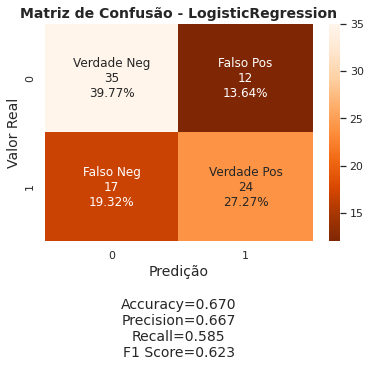

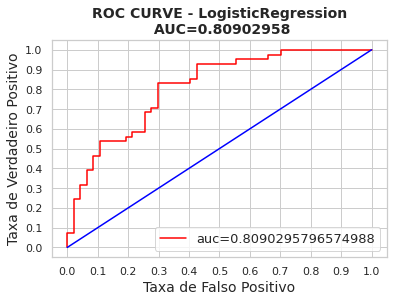

In [ ]:
logistic_regre_class = LogisticRegression()
exibe_result_modelo_machine_learning_grid_search(logistic_regre_class, 
                                                 df_machine_learn_sirio_libanes_sem_corr, 
                                                 8, 10, param_Logistic_Regression, "LogisticRegression")

### -***Random Forest - sem variáveis com alta correlação***

In [ ]:
param_Random_Forest = {
    "n_estimators" : [10, 100, 1000],
    "max_features" : ['sqrt', 'log2'],
    "max_depth" : [20], 
    "random_state" : [0]
    } 

In [ ]:
random_forest_class = RandomForestClassifier()

 AUC Médio: 0.7935
Intervalo de confiança = 0.6220 - 0.9650


Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        47
           1       0.71      0.61      0.66        41

    accuracy                           0.70        88
   macro avg       0.71      0.70      0.70        88
weighted avg       0.71      0.70      0.70        88



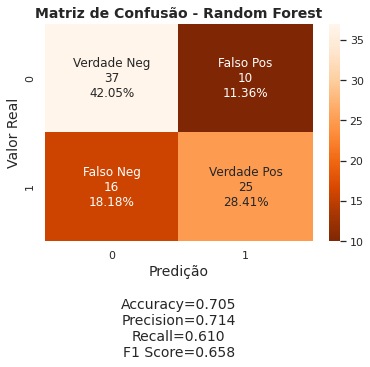

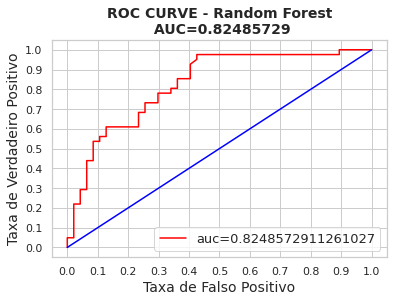

In [ ]:
random_forest_class = RandomForestClassifier()
exibe_result_modelo_machine_learning_grid_search(random_forest_class, 
                                                 df_machine_learn_sirio_libanes_sem_corr, 
                                                 8, 10, param_Random_Forest, "Random Forest")

###**6.3.3 Aplicar Melhores Algoritmo com base sem váriaves correlacionadas em grau elevado**


### -***Extra Tree Classifier - sem variáveis com alta correlação***

In [ ]:
param_extra_tree = {
    "max_depth" : range(3, 6),
    "criterion" : ["gini"],
    "n_estimators" : [100],
    "n_jobs":[-1]
    }  

In [ ]:
extra_tree_class = ExtraTreesClassifier()

 AUC Médio: 0.7602
Intervalo de confiança = 0.5985 - 0.9220


Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.83      0.74        47
           1       0.73      0.54      0.62        41

    accuracy                           0.69        88
   macro avg       0.70      0.68      0.68        88
weighted avg       0.70      0.69      0.69        88



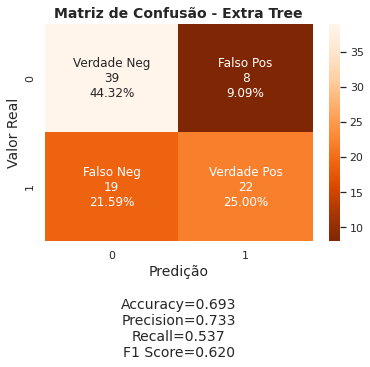

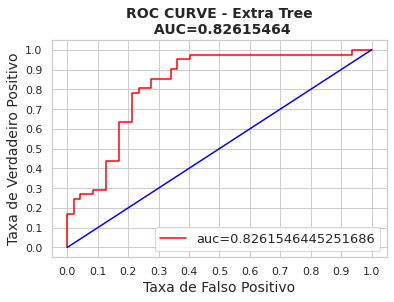

In [ ]:
exibe_result_modelo_machine_learning_grid_search(extra_tree_class, 
                                                 df_machine_learn_sirio_libanes_sem_corr, 
                                                 8, 10, param_extra_tree, "Extra Tree")

### -***Gradient Boosting Classifier - sem variáveis com alta correlação***

In [ ]:
param_gradient_boost = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 2, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 1, 12),
    "max_depth":[3],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse"],
    "subsample":[1.0],
    "n_estimators":[100]
    }

In [ ]:
gradient_boost = GradientBoostingClassifier()

 AUC Médio: 0.7757
Intervalo de confiança = 0.6256 - 0.9258


Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        47
           1       0.85      0.68      0.76        41

    accuracy                           0.80        88
   macro avg       0.81      0.79      0.79        88
weighted avg       0.80      0.80      0.79        88



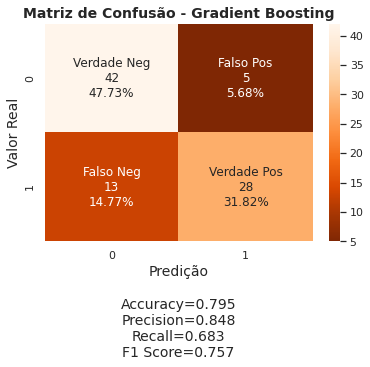

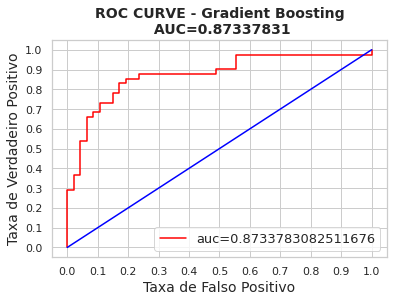

In [ ]:
gradient_boost = GradientBoostingClassifier()
exibe_result_modelo_machine_learning_grid_search(gradient_boost, 
                                                 df_machine_learn_sirio_libanes_sem_corr, 
                                                 8, 10, param_gradient_boost, "Gradient Boosting")

##**6.4 Redução da dimensionalidade com *PCA - Principal Component Analysis (PCA)***

A quantidade de campos (*features*) na base de dados do Hospital Sírio Libanês, mesmo após a remoção das colunas com alta correlação, ainda é bastate elevado. Vamos utilizar uma técnica para diminuir a quantidade de *features*, com o objetivo de diminuir o tempo de execução dos modelos e melhorar seu desempenho.

Portanto, utilizaremos o *Principal Component Analysis*, PCA, que é um técnica de redução linear de dimensionalidade.

 O algoritmo busca baixar a dimensionalização representativa dos dados, enquanto mantêm a maior variebilidade possível. 
O principal conceito do *PCA* é considerar o montante das correlações das variáveis existentes nos dados. Se a correlação do subconjunto de *features* é alta, PCA combinará as variáveis com alta correlação e representará os dados com um número linear menor de variáveis não correlacionadas.

O propósito do algoritmo é reduzir a correlção buscando as o máximo de variância dos dados originais e projetá-los em uma espaço dimensional menor. Os novas variáveis derivadas destes componentes são conhecidos como ***principal components*** **[13]** . 

###**6.4.1 Funções para aplicação de *PCA***

É necessária a padronização dos dados, pois o *PCA* é influênciado pelas escalas das *features*, então é preciso escalabilizar as variáveis da base de dados antes de aplica o algoritmo. Para isso, utilizaremos o *StandardScaler*, que ajuda a padronizar as variáveis do conjunto de dados em uma escala de 0 e 1 (média = 0 e variancia = 1), requisito para otimizar a performance de algoritmos de *Machine learning* **[14]**

In [ ]:
def prepara_dados_StandardScaler(dados):
  #np.random.seed(1231234) 
  dados = dados.sample(frac=1).reset_index(drop=True) 
  x_columns = dados.columns
  y = dados["ICU"]
  x = dados[x_columns].drop(["ICU"], axis=1)

  x_train_pre_dado, x_test_pre_dado, y_train_pre_dado, y_test_pre_dado = train_test_split(x, y, stratify=y)

  return x_train_pre_dado, x_test_pre_dado, y_train_pre_dado, y_test_pre_dado

In [ ]:
def exec_StandardScaler(x_train, x_test):
  sc = StandardScaler()
  x_train_sc = sc.fit_transform(x_train)
  x_test_sc = sc.transform(x_test)
  return x_train_sc,x_test_sc

In [ ]:
def exec_PCA_test_train(x_train_sc, x_test_sc, num_components):
  pca = PCA(num_components)
  x_train_pca = pca.fit_transform(x_train_sc)
  x_test_pca = pca.transform(x_test_sc)

  explained_variance = pca.explained_variance_ratio_
  return x_train_pca,x_test_pca, explained_variance

In [ ]:
def exec_classifier_pca(model_classifier, x_train_pca, x_test_pca, y_train ):
  model_classifier.fit(x_train_pca, y_train)
  y_pred = classifier.predict(x_test_pca)
  return model_classifier, y_pred

In [ ]:
def exibe_classification_report_pca(y_test,y_pred):
  print('Classification Report: ')
  print(classification_report(y_test,y_pred))

In [ ]:
def matriz_confusao_pca(matriz_cf, title_model ):
  group_names = ["Verdade Neg","Falso Pos","Falso Neg","Verdade Pos"]
  make_confusion_matrix(matriz_cf, group_names=group_names, categories='auto', count=True, percent=True,
                          cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None,
                          cmap='Oranges_r', title='Matriz de Confusão - '+ title_model)


In [ ]:
def exec_PCA(model, dados, number_components, n_repeats, titulo_pca):
  modelos_matriz_confusao=[]
  auc_lista = []

  for i in range(n_repeats):
    x_train, x_test, y_train, y_test = prepara_dados_StandardScaler(dados)
    x_train_sc,x_test_sc =  exec_StandardScaler(x_train, x_test)
    x_train_pca,x_test_pca, explained_variance = exec_PCA_test_train(x_train_sc, x_test_sc, number_components)
    model_fited, y_pred = exec_classifier_pca(model, x_train_pca, x_test_pca, y_train )
    modelos_matriz_confusao.append(confusion_matrix(y_test, y_pred))
    auc = metrics.roc_auc_score(y_test, model.predict_proba(x_test_pca)[::,1])
    auc_lista.append(auc)
    
  media_matriz_confusao = np.mean(modelos_matriz_confusao, axis=0)
  cf_matrix_pca = np.around(media_matriz_confusao)

  auc_medio = np.mean(auc_lista)
  auc_std = np.std(auc_lista)
  print(f'Explained Variance = { explained_variance}\n') 
  print(f"\nAUC Médio: {auc_medio}")
  print(f"\n Intervalo de confiança: {auc_medio - 2 * auc_std} - {auc_medio + 2 * auc_std}\n")

  matriz_confusao_pca(cf_matrix_pca,titulo_pca)

  

  plot_roc_auc(model_fited, x_test_pca, y_test, titulo_pca )

###**6.4.2 Aplicação dos algoritmos com *PCA***

Vamos utilizar o PCA para reduzir as *features* para um 10 componentes principais

### -***Logistic Regression - PCA***

In [ ]:
logistic_regress_PCA = LogisticRegression(max_iter= 10000)

Explained Variance = [0.07196974 0.06568523 0.05629719 0.04895745 0.04419521 0.04117418
 0.04052337 0.03748981 0.03084233 0.02982171]


AUC Médio: 0.778723404255319

 Intervalo de confiança: 0.6650108591375942 - 0.8924359493730439



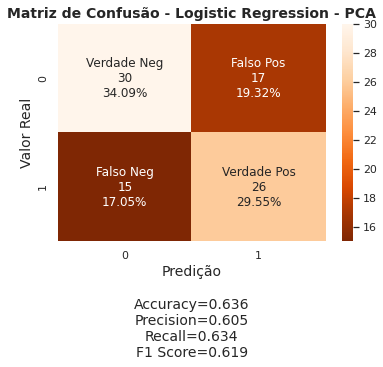

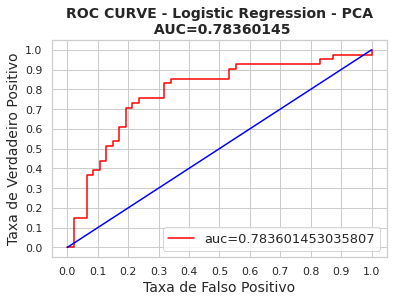

In [ ]:
exec_PCA(logistic_regress_PCA, df_machine_learn_sirio_libanes_sem_corr, 10,10, "Logistic Regression - PCA")

### -***Random Forest - PCA***

In [ ]:
random_forest_PCA = RandomForestClassifier(n_estimators = 1000, max_features = 'log2',
                                    max_depth = 20, random_state = 0)

Explained Variance = [0.07205882 0.06699731 0.05511819 0.05226671 0.04697094 0.04364387
 0.04155064 0.03841758 0.03293717 0.03058299]


AUC Médio: 0.7627400103788272

 Intervalo de confiança: 0.6961619574661116 - 0.8293180632915428



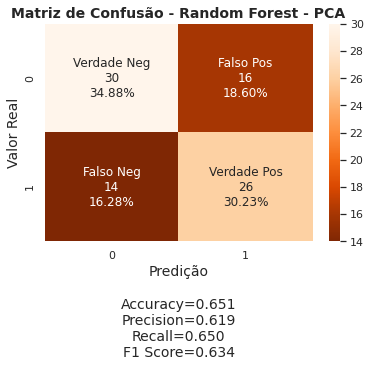

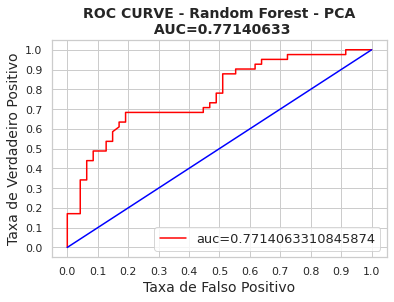

In [ ]:
exec_PCA(random_forest_PCA, df_machine_learn_sirio_libanes_sem_corr, 10, 10, "Random Forest - PCA")

### -***Extra Tree - PCA***

In [ ]:
extra_tree_PCA = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=321, verbose=0,
                      warm_start=False)

Explained Variance = [0.07411118 0.07198531 0.06592963 0.05513989 0.04716529 0.04210407
 0.03935006 0.03734503 0.0341523  0.03164642]


AUC Médio: 0.753425012973534

 Intervalo de confiança: 0.6870889397210612 - 0.8197610862260069



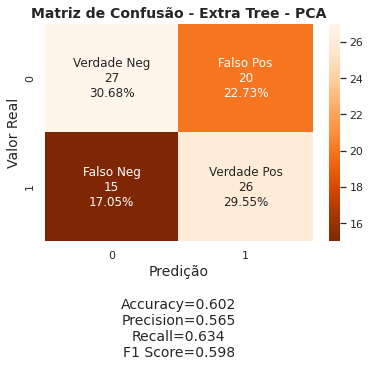

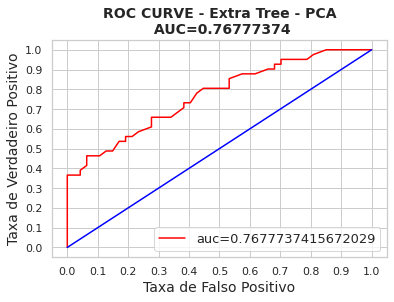

In [ ]:
exec_PCA(extra_tree_PCA, df_machine_learn_sirio_libanes_sem_corr, 10, 10,"Extra Tree - PCA")

### -***Gradient Boosting - PCA***

In [ ]:
gradient_boosting_PCA = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                                                   learning_rate=0.1, loss='deviance', max_depth=3,
                                                   max_features=None, max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0, min_impurity_split=None,
                                                   min_samples_leaf=1, min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0, n_estimators=100,
                                                   n_iter_no_change=None, presort='deprecated',
                                                   random_state=321, subsample=1.0, tol=0.0001,
                                                   validation_fraction=0.1, verbose=0,
                                                   warm_start=False)

Explained Variance = [0.07338682 0.06585898 0.0547279  0.05193458 0.045673   0.04261256
 0.04044874 0.03868931 0.03132719 0.03094728]


AUC Médio: 0.7583290088220032

 Intervalo de confiança: 0.6722772644081167 - 0.8443807532358896



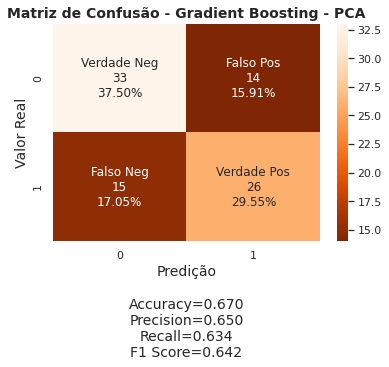

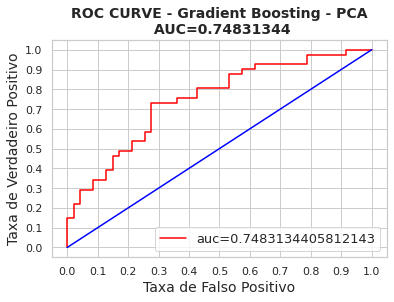

In [ ]:
exec_PCA(gradient_boosting_PCA, df_machine_learn_sirio_libanes_sem_corr, 10, 10,"Gradient Boosting - PCA")

#**7. Resultado Resumido**

Os resultados em laranja são os valores menores os em azul são os maiores.



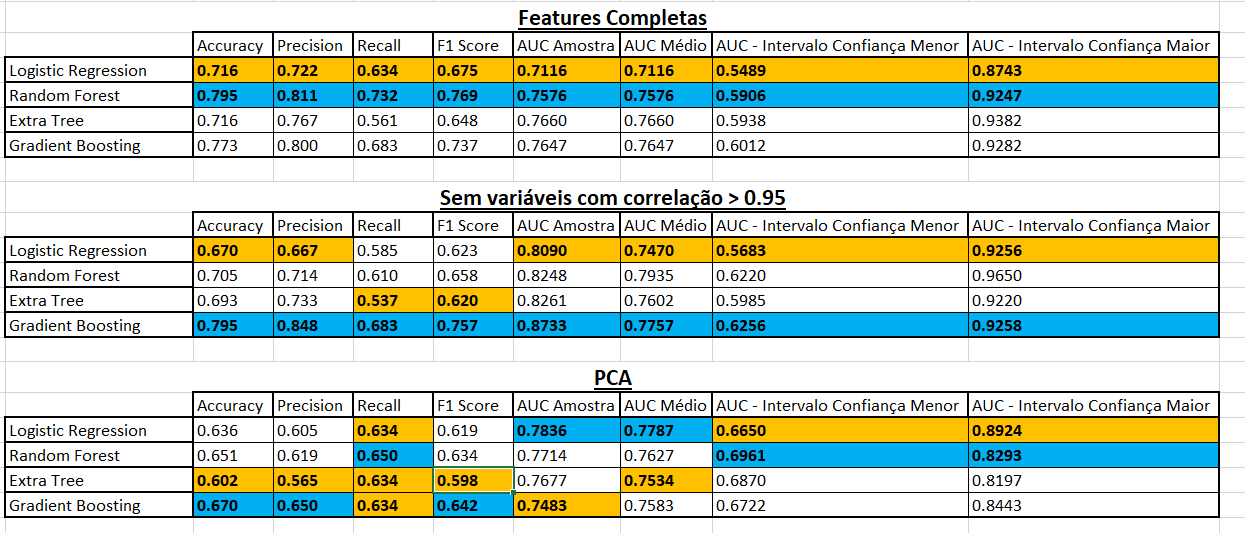

##**7.1. Análise dos resultados dos modelos de *Machine Learning***
Realizaremos a análise por cada grupo de execução dos modelos de *Machine Learning*: Com todas as ***Features completas*** da base de dados, ***sem as variáveis com correlação acima de 70%*** , com a ***aplicação do PCA*** .
Portanto, precisamos definir critérios para avalição das métricas de avaliação dos algoritmos de MA.

Revisão rápidas dos críterios para contextualização **[15]**:
- *Accuracy:* performance geral do algoritmo de *Machine learning*;
- *Precision:* taxa de classificação positiva quando realmente são positicas;
- *Recall:* taxa de frequência da classificação corretas das classes;
- *F1 score:*  média harmônica entre precisão e recall.

No cenário estudado, existem situações que poderiam ser trazer prejuízo para uma tomada de decisão equivocada. Se o modelo infere que um pessoa não deveria ser admitida para a UTI e essa ser admitida na UTI, caso **FALSO POSITIVO**, isso poderia retirar uma vaga de leito para quem realmente precisa. 

Em outra situação,  classifica-se um paciente que deveria ir para a UTI, e o modelo inferiu o contrário, então, caso de **FALSO NEGATIVO**, o paciente poderia estar em risco de morte.

A métrica *Precision* é recomendada em casos que o **FALSO NEGATIVO** causa mais dano do que os casos de **FALSO POSITIVO**.

A métrica *Recall* é para casos em que o **FALSO POSITIVO** é mais prejúdicial que o **FALSO NEGATIVO**.

Em síntese, uma baixo valor de *Precision* ocasionaria risco de morte, um baixo valor de *Recall*, uma vaga de UTI ocupada sem necessidade.

A métrica AUC (*Are Under The Curve*) mede a habilidade de um modelo classificador distinguir entre classes, quanto maior o AUC melhor o modelo executa a distinção entre classificação das classes em negativo e positivo **[16]**.

A métrica *F1-Score* indica em um só valor o *Precision* e o *Recall*, se ele está baixo, uma das duas métricas está baixa, o mesmo ocorre para o valores altos.

*Accuracy*, mede a performance geral do modelo.

Então vamos priorizar as métricas nesta ordem: *Precision, Recall, AUC médio, F1-Score, Accuracy*

In [5]:
modelo_labels = ['Logistic Regression','Random Forest','Extra Tree','Gradient Boosting']

In [6]:
valores_Features_Completas = {
                              'Accuracy' : [0.716, 0.795, 0.716, 0.773],
                              'Precision' : [0.722, 0.811, 0.767, 0.800],
                              'Recall' : [0.634, 0.732, 0.561, 0.683],
                              'F1 Score' : [0.675, 0.769, 0.648, 0.737],
                              'AUC Amostra' : [0.7116, 0.7576, 0.7660, 0.7647],
                              'AUC Médio' : [0.7116, 0.7576, 0.7660, 0.7647],
                              'AUC - Intervalo Confiança Menor' :  [0.5489, 0.5906, 0.5938, 0.6012],
                              'AUC - Intervalo Confiança Maior' :  [0.8743, 0.9247, 0.9382, 0.9282] }
df_features_completas = pd.DataFrame(data = valores_Features_Completas, index = modelo_labels)                              

In [7]:
sem_corr_95 = {
                'Accuracy' : [0.670,	0.705, 0.693, 0.795],
                'Precision' : [0.667,	0.714, 0.733, 0.848],
                'Recall' : [0.585,	0.610, 0.537, 0.683],
                'F1 Score' : [0.623,	0.658, 0.620, 0.757],
                'AUC Amostra' : [0.8090, 0.8248, 0.8261, 0.8733],
                'AUC Médio' : [0.7470, 0.7935, 0.7602, 0.7757],
                'AUC - Intervalo Confiança Menor' :  [0.5683, 0.6220, 0.5985, 0.6256],
                'AUC - Intervalo Confiança Maior' :  [0.9256, 0.9650, 0.9220, 0.9258]}
df_sem_corr_95 = pd.DataFrame(data = sem_corr_95, index = modelo_labels)

In [8]:
valores_pca = {
                'Accuracy' : [0.636, 0.651, 0.602, 0.670],
                'Precision' : [0.605, 0.619, 0.565, 0.650],
                'Recall' : [0.634, 0.650, 0.634, 0.634],
                'F1 Score' : [0.619, 0.634, 0.598, 0.642],
                'AUC Amostra' : [0.7836, 0.7714, 0.7677, 0.7483],
                'AUC Médio' : [0.7787, 0.7627, 0.7534, 0.7583],
                'AUC - Intervalo Confiança Menor' : [0.6650, 0.6961, 0.6870, 0.6722],
                'AUC - Intervalo Confiança Maior' : [0.8924, 0.8293, 0.8197, 0.8443]}
df_valores_pca = pd.DataFrame(data = valores_pca, index = modelo_labels)

###**7.1.1. Features Completas - Análise**

Como apresentado na tabela do **tópico 6**, e de acordo com os valores das métricas e critérios de avaliação, também é possível observar no gráfico "Featurs Completas" o modelo que tem a melhor performance é o ***Random Forest*** e a pior é o ***Logistic Regression***, o que tem a segunda melhor é o ***Gradient Boosting*** seguido em terceiro por ***Extra Tree***.

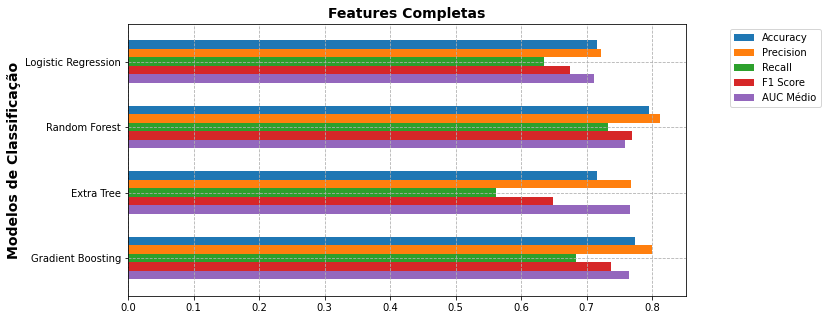

In [16]:
plot_bar_result(df_features_completas, "Features Completas")

###**7.1.2. Sem variáveis com correlação > 0.95% - Análise**


Após retirar as *features* com correlação acima de 0.95 e diminuir a dimensionalidade da base de dados, e aplicar os algoritmos de *Machine Learning*, de acordo com os critérios temos, melhor performance ***Gradient Boosting***, seguidos por ***Random Forest***, ***Extra Tree*** e com a pior ***Logistic Regression***

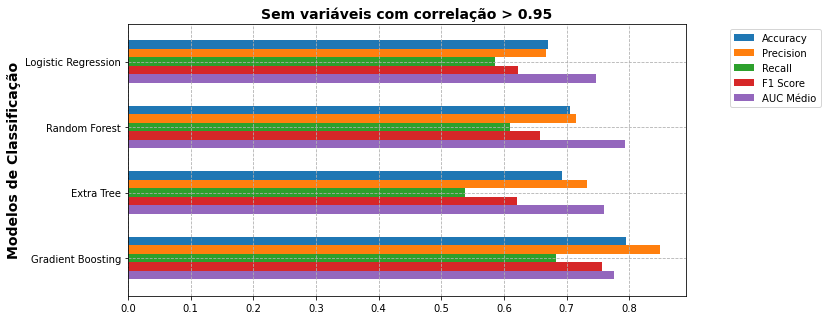

In [15]:
plot_bar_result(df_sem_corr_95, "Sem variáveis com correlação > 0.95")

###**7.1.3. Após aplicação do PCA - Análise**

Depois de retirar as *features* com correlação acima de 0.95%, e aplicar o PCA para diminuir ainda mais dimensionalidade da base de dados,  e executar os algoritmos de *Machine Learning*, de acordo com os critérios de avaliação,  tem-se, melhor performance ***Gradient Boosting***, seguidos por ***Random Forest***, ***Logistic Regression*** e com a pior ***Extra Tree***.

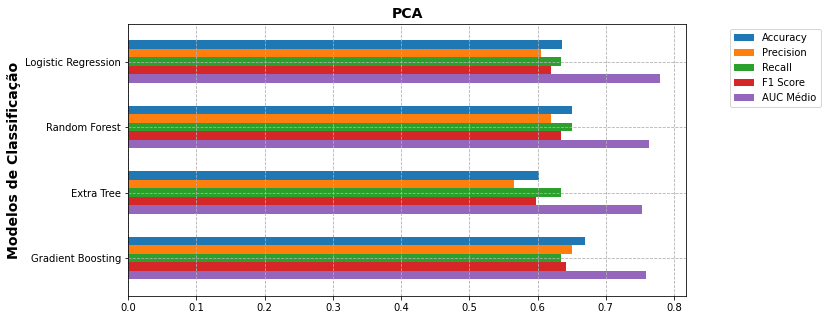

In [14]:
plot_bar_result(df_valores_pca, "PCA")

###**7.4. Avaliação, Modelos e Cenários**


Como pode-se observar na Tabela de  Resultado Resumidos **Tópico 6** em termos de valores, os resultados são bem melhores quando são retirados as **features** com alta correlação (acima de 0.95). 

Verifica-se, portanto, que os algoritmos performaram melhor sem as variáveis com alta correção do que com a base completa com todas as *features*.

No caso da aplicação do PCA após a redução da variáveis com alta correlação, pode-se observar que os valores diminuiram significativamente, próximo de 10%, ou seja os modelos performaram pior, entretanto o tempo de execução deste foi reduzido significativamente, apenas informativo, o tempo do modelo *Gradient Boosting* no cenário **sem as variáveis com alta correlação** estava próximo aos 30 minutos.

Por fim, hipoteticamente se tivéssimos que selecionar um modelo e um cenário para aplicar a tomada de decisão desta base do Hospital Sírio Libanês, seria selecionado o modelo ***Gradient Boosting*** **no cenário " Sem as Variáveis com Correlação Superior a 0.95**.

Resultado que se aproxima do demonstrado pelo PyCaret no **tópico 6.3.1**

#**8. Considerações Finais**

Foi realizada o estudo dos dados de pacientes do Hospital Sírio Libanês, que poderiam ser admitidos ou não nas Unidades de Tratamento Intensivo (UTI).
Os dados faltantes foram identificados e tratados.
Após, na análise dos dados, verificou-se que as informações referentes a idade acima de 65 anos dos pacientes (**ABOVE_65**) era relevante para internação na UTI, sendo frequentemente admitidos pacientes com esta informação verdadeira, ou seja, possuiam idade superior a 65 anos, enquanto pacientes com idade inferior a 65 anos eram admitido em menor frequência. 

Nos outros dados categorigos dos grupos de doença (**DISEASE GROUPING 1 ao 6**), pressão arterial (**HTN**), imunucomprometidos (**IMMUNOCOMPROMISED**), os pacientes que  apresentavam essa característica, eram frequentemente mais admitdos na UTI em comparação aqueles que não eram admitidos, entretanto, a maior quantidade de admitidos na UTI não apresentavam essa característica, semelhante aos dados dos pacientes não admitidos, assim, não apresentando relevância na decisão de admissão na UTI.

A variável outros (**OTHER**) tanto os admitidos, ou não admitidos apresentavam essa característica mais frequentemente. Como não é fornecido o significado desta variável, nem qual o critério de um paciente apresentar ou não, tornou-se irrelevante para a decisão de admitir na UTI.

Quanto aos dados de valores contínuos, a informação que apresentou maior relevância foi a variável **LACTATE**, os pacientes internados na UTI frequentemente apresentavam essa caractéristica com valores próximos a 1, diferente dos que não eram admitidos na UTI que apresentavam essa caractéristica em valores muito menores.

Quanto aos modelos de *Machine Learning* escolhidos foram *Logistic Regression* e *Random Forest*, por intuito, e *Extra Tree* e *Gradient Boosting* por sugestão da biblioteca *Pycaret*.

Foram testados os modelos nos cenários em que considerava as *Features completas* da base de dados, sem as variáveis com correlação superior a 0.95, e após aplicado o algoritmo de *Principal Component Analysis* (PCA). O objetivo, portanto, era diminuir a quantidade de *features* disponíveis mantendo a maior variância possível em um espaço dimensional menor. Por fim, o algoritmo de melhor desempenho foi o ***Gradient Boosting*** , no cenário da base **sem as variáveis com correlação superior a 0.95**. Semelhante ao proposto pela biblioteca PyCaret.

Verifca-se a relevância na diminuição de *features* da base de dados e na performance dos algoritmos. Um método de seleção das melhores *features* poderia aperfeiçoar o desempenho dos modelos de *Machine Learning* aplicados.

Outro fator que também ajudaria no teste de aplicação dos modelos, seria um melhor conhecimento da aplicação dos Hiperparâmetros ao executar os algoritmos de *Machine Learning*.



#**9. Referências**
###[1] COVID-19 
>https://pt.wikipedia.org/wiki/COVID-19
###[2] Pandemia de COVID-19
>https://pt.wikipedia.org/wiki/Pandemia_de_COVID-19
###[3] The COVID-19 coronavirus epidemic has a natural origin, scientists say
>https://www.eurekalert.org/pub_releases/2020-03/sri-tcc031720.php
###[4] Diante da falta de vagas medicos discutem regras para escolher quem vai para uti
>https://oglobo.globo.com/sociedade/diante-da-falta-de-vagas-medicos-discutem-regras-para-escolher-quem-vai-para-uti-24962507
###[5] COVID-19 NO BRASIL - Casos e Óbitos
>https://susanalitico.saude.gov.br/extensions/covid-19_html/covid-19_html.html
###[6] COVID-19 - Clinical Data to assess diagnosis Sírio-Libanês data for AI and Analytics by Data Intelligence Team
>https://www.kaggle.com/S%C3%ADrio-Libanes/covid19
###[7] Confusion Matrix Visualization DTrimarchi10 / confusion_matrix
>https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

>https://github.com/DTrimarchi10/confusion_matrix

###[8] 3.1. Cross-validation: evaluating estimator performance¶
>https://scikit-learn.org/stable/modules/cross_validation.html
###[9] sklearn.model_selection.RepeatedStratifiedKFold
>https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html
###[10] Pycaret: An open source low-code machine learning library.|
>https://pycaret.org/
###[11] Multicollinearity in Regression Analysis: Problems, Detection, and Solutions By Jim Frost 
>https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/
###[12] Why Feature Correlation Matters …. A Lot! By Will Badr 
>https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4
###[13] Principal Component Analysis (PCA) with Scikit-learn 
>https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0
###[14] PCA using Python (scikit-learn)
>https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
###[15] Métricas de Avaliação: acurácia, precisão, recall… quais as diferenças?
>https://medium.com/@vitorborbarodrigues/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c
###[16] AUC-ROC Curve in Machine Learning Clearly Explained
>https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
